# TASK 1:

The first and main project task is to extract top 30,000 galaxies with narrow emission lines with
redshift z<0.3 from the SDSS database (e.g. DR17 or DR18 –http://www.sdss.org/) using the SQL
search and produce BPT diagram.

Obtain the following line fluxes [O III] λ5007, Hβ, [N II] λ6583, Hα, [S II] λλ6716, 6731, [O I]
λ6300, and equivalent width of Ha from the SDSS spectral databases (tips: when selecting
galaxies define as one of the criteria that you only need narrow emission line; find a way to
calculate line fluxes using only data available in SDSS tables). For the division line use the
theoretical curves obtained by Kewley et al. (2001) and empirical curves from Kauffman et al.
(2003). Make plots for [O III] λ5007/Hβ vs. [N II] λ6583/Hα, denoting with different marks/colors
different object 

# Query 1 in SDSS

SELECT TOP 30000
 
--count(*)

s.plate, s.mjd, s.fiberid,s.z,s.ra, s.dec,

g.oiii_5007_flux, g.nii_6584_flux, sii_6717_flux ,g.sii_6731_flux, g.oi_6300_flux,

g.h_alpha_flux, g.h_beta_flux, g.h_alpha_eqw

FROM SpecObj AS s

JOIN GalSpecLine AS g ON s.specobjid = g.specobjid

JOIN galSpecInfo AS i ON s.specobjid = i.specobjid

WHERE

g.h_beta_eqw < 0 -- ensure emission in H_beta

AND g.oiii_5007_eqw < 0 -- ensure emission in [OIII]5007

AND g.nii_6584_eqw < 0 --ensure emission in [NII]6583

AND g.sii_6717_eqw < 0 -- ensure emission in [SII]6517

AND g.sii_6731_eqw <0

AND g.oi_6300_eqw<0

AND g.h_alpha_eqw < 0 -- ensure emission in H_alpha

AND g.h_beta_eqw < 0 

AND g.oiii_5007_flux >0

AND g.nii_6584_flux>0

AND g.sii_6717_flux > 0

AND g.sii_6731_flux > 0

AND g.oi_6300_flux >0

AND g.h_alpha_flux>0

AND g.h_beta_flux>0

AND SQRT(8*LOG(2)) * g.sigma_balmer <500 -- FWHM = sigma * sqrt(8*ln(2))

AND s.class = "GALAXY"

AND s.z < 0.3



In [1]:
#Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Read the SDSS data set

df=pd.read_csv('/home/sagarika/belgrade/agn/project/Skyserver_SQL5_6_2023 5 57 50 PM.csv')
df     

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060


In [3]:
# [SII] doublet fluxes have been added according to Veilleux & Osterbrock(1987) 
#(https://ui.adsabs.harvard.edu/abs/1987ApJS...63..295V/abstract)

df['sii_doublet']=df['sii_6717_flux']+df['sii_6731_flux']
df

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820,37.751560
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360,104.490310
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560,93.555720
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730,74.909410
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180,170.440240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471,10.366593
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430,56.982090
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198,16.814076
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060,202.956090


In [4]:
#Calculating line ratios

r_nii_ha=df['nii_6584_flux']/df['h_alpha_flux']   #Line ratio of [NII]/Hα

r_oiii_hb=df['oiii_5007_flux']/df['h_beta_flux']    #Line ratio of [OIII]/Hβ

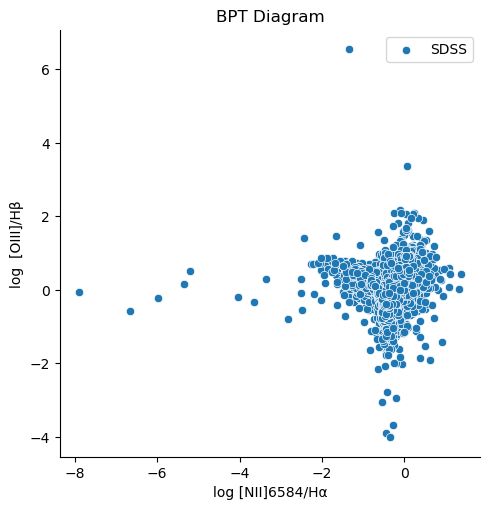

In [5]:
#Plotting the BPT diagram

sns.relplot( data=df, x=np.log10(r_nii_ha), y=np.log10(r_oiii_hb), label='SDSS')
plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")
plt.legend()

In [6]:
#Equation of theoretical curve from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al. 2001
y_kw=(0.61/(np.log10(r_nii_ha)-0.47)) +1.19


#Equation of emperical curve from https://arxiv.org/pdf/astro-ph/0304239.pdf  Kauffmann et al. 2003
y_kf=(0.61/(np.log10(r_nii_ha)-0.05)) +1.3

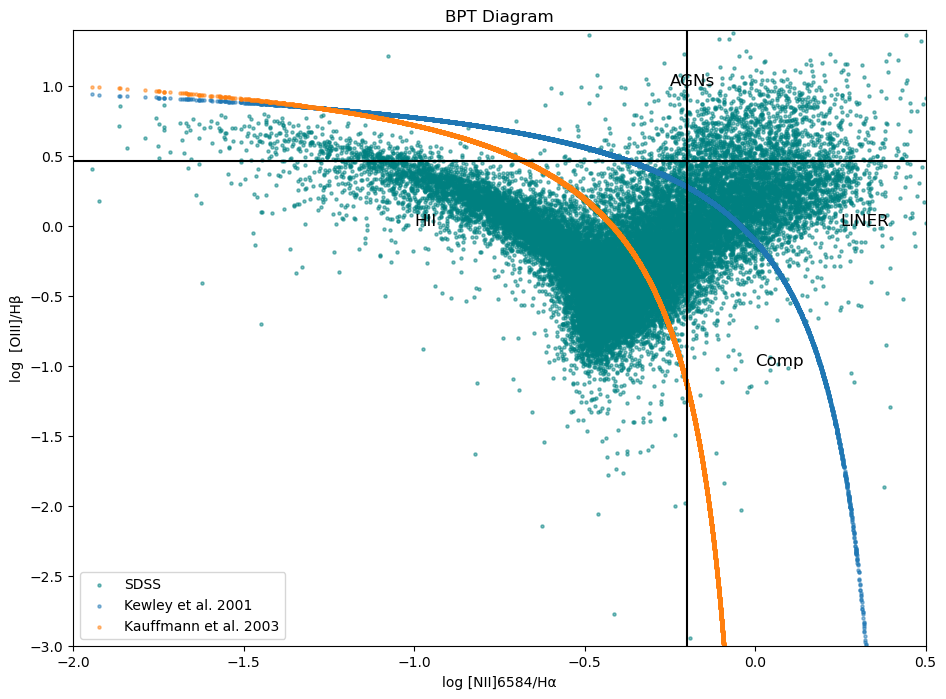

In [7]:
#Plotting the BPT diagram with the classification

plt.figure(figsize=(11,8))

plt.scatter(np.log10(r_nii_ha),np.log10(r_oiii_hb), label='SDSS' , color='teal',s=5, alpha =0.5)
plt.scatter(np.log10(r_nii_ha),(y_kw), label='Kewley et al. 2001', s=5, alpha=0.5)
plt.scatter(np.log10(r_nii_ha),(y_kf), label= 'Kauffmann et al. 2003',s=5, alpha=0.5)



plt.axhline(y=0.46, color='black')#, linestyle='--')
plt.axvline(x=-0.2, color='black')#, linestyle='--')

plt.xlim(-2,0.5)
plt.ylim(-3,1.4)

plt.text( 0.0,-1.0, 'Comp',fontsize=12)
plt.text( 0.25,0.0, 'LINER',fontsize=12)
plt.text( -0.25,1.0, 'AGNs',fontsize=12)
plt.text( -1.0,0.0, 'HII',fontsize=12)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")
plt.legend()

In [8]:
# For classification of data I have written the equations as y=f(x) and also as x=f(y). 
# This is to classify the data points based on the x and y co-ordinates in the BPT diagram

#Equation of theoretical curve from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al. 2001
y_kw=(0.61/(np.log10(r_nii_ha)-0.47)) +1.19
x_kw=0.47+(0.61/(np.log10(r_oiii_hb)-1.19))


#Equation of emperical curve from https://arxiv.org/pdf/astro-ph/0304239.pdf  'Kauffmann et al. 2003'
y_kf=(0.61/(np.log10(r_nii_ha)-0.05)) +1.3
x_kf= (0.61/(np.log10(r_oiii_hb)-1.3)) +0.05

In [9]:
#Classification of data points with different colours

hii = (y_kf >= np.log10(r_oiii_hb)) & (x_kf>=np.log10(r_nii_ha))
agn = (y_kw <= np.log10(r_oiii_hb)) &  (x_kw <= np.log10(r_nii_ha))
#comp = ~(hii | agn)
comp=(np.log10(r_oiii_hb)>=y_kf) & (np.log10(r_oiii_hb)<=y_kw)

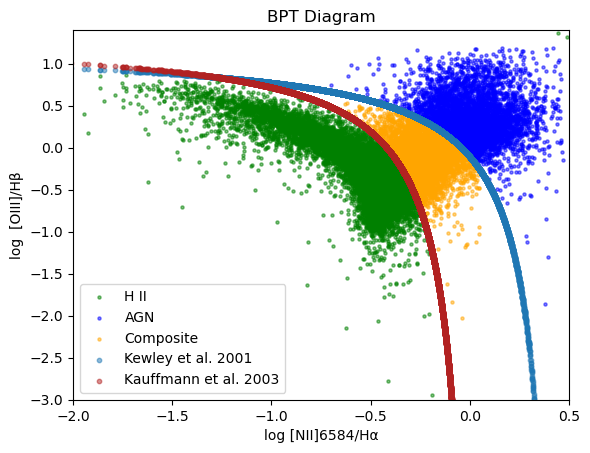

In [10]:
#plot the BPT diagram

plt.scatter(np.log10(r_nii_ha)[hii], np.log10(r_oiii_hb)[hii], c='green', s=5, label='H II', alpha=0.5)
plt.scatter(np.log10(r_nii_ha)[agn], np.log10(r_oiii_hb)[agn], c='blue', s=5, label='AGN',alpha=0.5)
plt.scatter(np.log10(r_nii_ha)[comp], np.log10(r_oiii_hb)[comp], c='orange', s=5, label='Composite',alpha=0.5)


plt.scatter(np.log10(r_nii_ha),(y_kw), label='Kewley et al. 2001', s=10, alpha=0.5)
plt.scatter(np.log10(r_nii_ha),(y_kf), label= 'Kauffmann et al. 2003',color='firebrick',s=10, alpha=0.5)

plt.xlim(-2,0.5)
plt.ylim(-3,1.4)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")
plt.legend()

In [11]:
#Classifying the objects in the dataframe based on types based on the above BPT diagram. 
warnings.filterwarnings(action='once')

df['label_nii'] = ''
for i in range(len(df)):
    if (y_kf[i] >= np.log10(r_oiii_hb[i])) & (x_kf[i]>=np.log10(r_nii_ha[i])):
        df['label_nii'][i] = 'HII'
    elif (y_kw[i] <= np.log10(r_oiii_hb[i])) &  (x_kw[i] <= np.log10(r_nii_ha[i])):
        df['label_nii'][i] = 'AGNs' 
    else:
        df['label_nii'][i] = 'Comp'
        

df 

/tmp/ipykernel_41726/2156028485.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_nii'][i] = 'HII'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820,37.751560,HII
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360,104.490310,HII
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560,93.555720,HII
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730,74.909410,HII
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180,170.440240,HII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471,10.366593,AGNs
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430,56.982090,HII
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198,16.814076,HII
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060,202.956090,HII


### Here the 'label_nii' has been added with the above classification. This is the First BPT classification.

In [12]:
#Counts of different objects
df['label_nii'].value_counts()

HII     18814
Comp     6512
AGNs     4674
Name: label_nii, dtype: int64

TASK 1a:

Test the classification obtained using the first BPT diagnostics [OIII]λ5007/Hβ vs. [NII]λ6584/Hα,
with the other two common BPT diagnostic tools: 1) [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα, 2)
[OIII]λ5007/Hβ vs. [OI]λ6300/Hα. (Tip: use the same mark/color notation as for the first
diagnostic in order to be able to make comparison).

In [13]:
#Calculating line ratios

#r_sii_ha=df['sii_6717_flux']/df['h_alpha_flux']   #Line ratio of [SII]/Hα for 6716
r_sii_ha=df['sii_doublet']/df['h_alpha_flux'] #Calcylating line ratio for [SII]doublet/Hα
r_oi_ha=df['oi_6300_flux']/df['h_alpha_flux']    #Line ratio of [OI]/Hα 

In [14]:
#from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al 2001

#For SII 6171
y_kw_s=(0.72/(np.log10(r_sii_ha)-0.32)) +1.30


#For classification:
x_kw_s=0.32+(0.72/(np.log10(r_oiii_hb)-1.30))

### Classification into HII regions and AGNs bases on [SII] Kewley et al. 2001 line

In [15]:
df['label_sii'] = ''
for i in range(len(df)):
    if (y_kw_s[i] >= np.log10(r_oiii_hb[i])) & (x_kw_s[i] >= np.log10(r_oiii_hb[i])):
        df['label_sii'][i] = 'HII' 
    else:
        df['label_sii'][i] = 'AGNs'
df  

/tmp/ipykernel_41726/1382214805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_sii'][i] = 'AGNs'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii,label_sii
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820,37.751560,HII,AGNs
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360,104.490310,HII,HII
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560,93.555720,HII,HII
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730,74.909410,HII,HII
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180,170.440240,HII,HII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471,10.366593,AGNs,AGNs
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430,56.982090,HII,AGNs
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198,16.814076,HII,HII
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060,202.956090,HII,HII


### 'label_sii' has been added to classify the objects based on the [S II] λλ6716, 6731 BPT classification

In [16]:
# Count of classified objects

df['label_sii'].value_counts()

HII     15803
AGNs    14197
Name: label_sii, dtype: int64

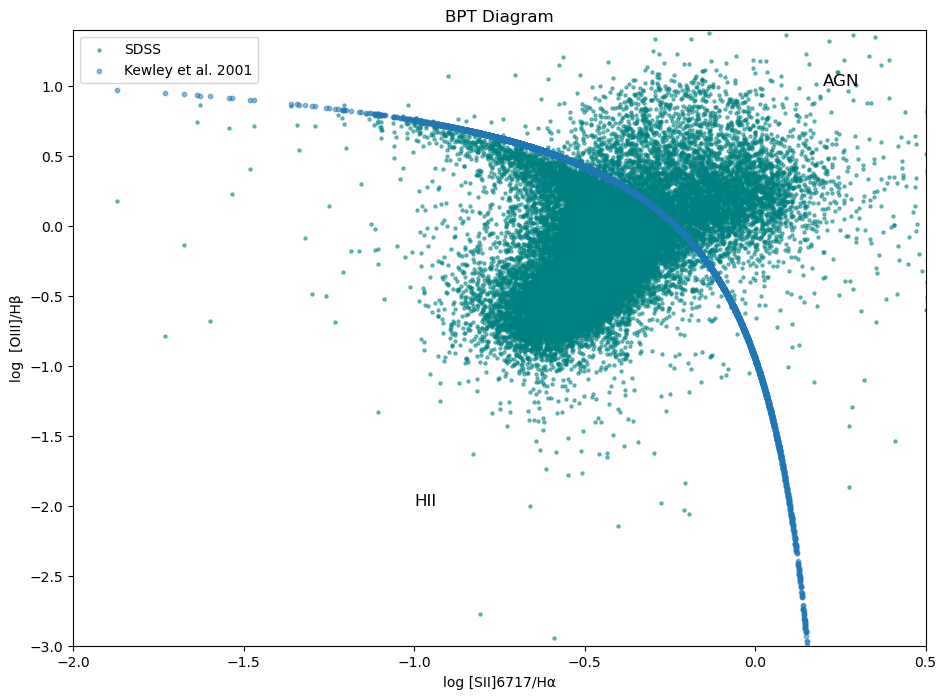

In [17]:
#Plotting the BPT diagram

plt.figure(figsize=(11,8))
plt.scatter(np.log10(r_sii_ha),np.log10(r_oiii_hb), label='SDSS' , color='teal',s=5, alpha =0.5)

plt.scatter(np.log10(r_sii_ha),(y_kw_s), label='Kewley et al. 2001', s=10, alpha=0.5)
plt.xlim(-2,0.5)
plt.ylim(-3,1.4)

plt.xlabel("log [SII]6717/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")

plt.text( 0.2,1.0, 'AGN',fontsize=12)


plt.text( -1.0,-2.0, 'HII',fontsize=12)

plt.legend()

<Figure size 1100x800 with 0 Axes>

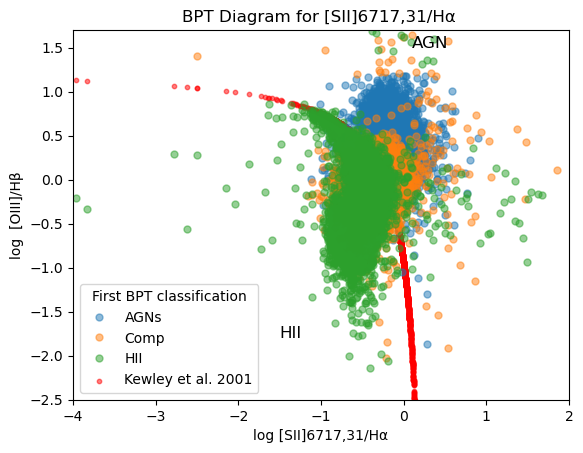

In [18]:
#Plotting the BPT diagram based on the first BPT classification. 

x=np.log10(r_sii_ha)
y=np.log10(r_oiii_hb)
labels=df['label_nii']

df3 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df3.groupby('label')

# Plot

plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.scatter(np.log10(r_sii_ha),(y_kw_s), label='Kewley et al. 2001',color='red', s=10, alpha=0.5)
plt.xlabel("log [SII]6717,31/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram for [SII]6717,31/Hα ")

plt.text( 0.1,1.5, 'AGN',fontsize=12)
plt.text( -1.5,-1.8, 'HII',fontsize=12) 

plt.xlim(-4,2.0)
plt.ylim(-2.5,1.7)

plt.legend(title='First BPT classification')

### Classification based on [OI] Kewley et al. 2001 line

In [19]:
#from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al. 2001

#For O[I]6300
y_kw_o=(0.73/(np.log10(r_oi_ha)+0.59)) +1.33


#For classification:
x_kw_o=0.59+(0.73/(np.log10(r_oiii_hb)-1.33))

In [20]:
df['label_oi'] = ''
for i in range(len(df)):
    if (y_kw_o[i] >= np.log10(r_oiii_hb[i])) & (x_kw_o[i] >= np.log10(r_oiii_hb[i])):
        df['label_oi'][i] = 'HII' 
    else:
        df['label_oi'][i] = 'AGNs'
df 

/tmp/ipykernel_41726/2400971454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_oi'][i] = 'HII'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii,label_sii,label_oi
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820,37.751560,HII,AGNs,HII
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360,104.490310,HII,HII,HII
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560,93.555720,HII,HII,HII
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730,74.909410,HII,HII,HII
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180,170.440240,HII,HII,HII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471,10.366593,AGNs,AGNs,AGNs
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430,56.982090,HII,AGNs,HII
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198,16.814076,HII,HII,HII
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060,202.956090,HII,HII,HII


### 'label_oi' has the classification based on the [OI] BPT diagram 

In [21]:
# Count of classification

df['label_oi'].value_counts()

HII     19025
AGNs    10975
Name: label_oi, dtype: int64

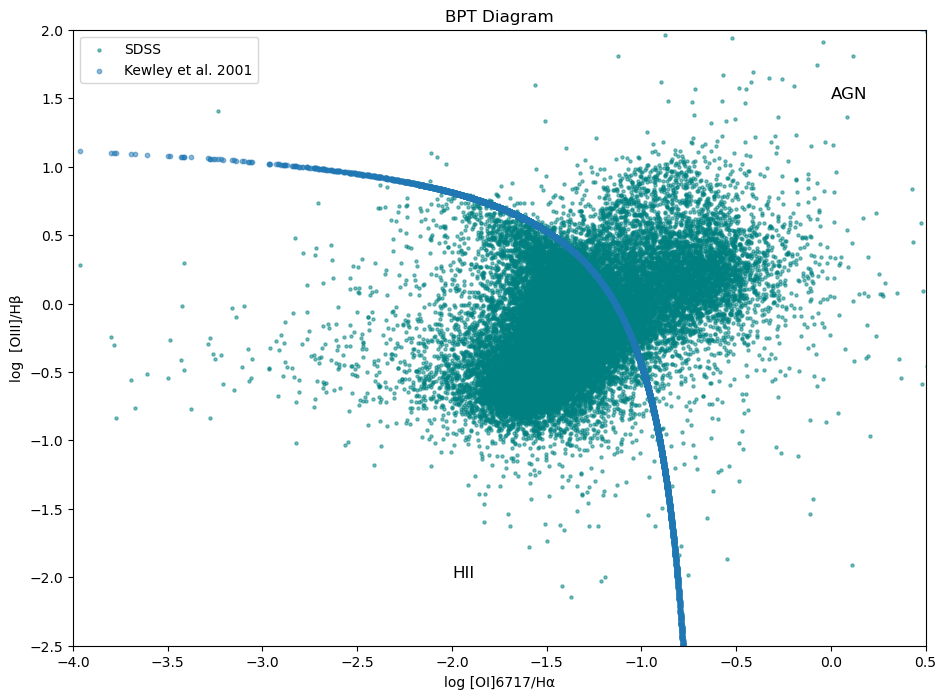

In [22]:
#Plotting the BPT diagram

plt.figure(figsize=(11,8))

plt.scatter(np.log10(r_oi_ha),np.log10(r_oiii_hb), label='SDSS' , color='teal',s=5, alpha =0.5)
plt.scatter(np.log10(r_oi_ha),(y_kw_o), label='Kewley et al. 2001', s=10, alpha=0.5)
plt.xlim(-4,0.5)
plt.ylim(-2.5,2)

plt.xlabel("log [OI]6717/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")

plt.text( 0.0,1.5, 'AGN',fontsize=12)
plt.text( -2.0,-2.0, 'HII',fontsize=12) 

plt.legend()

<Figure size 1100x800 with 0 Axes>

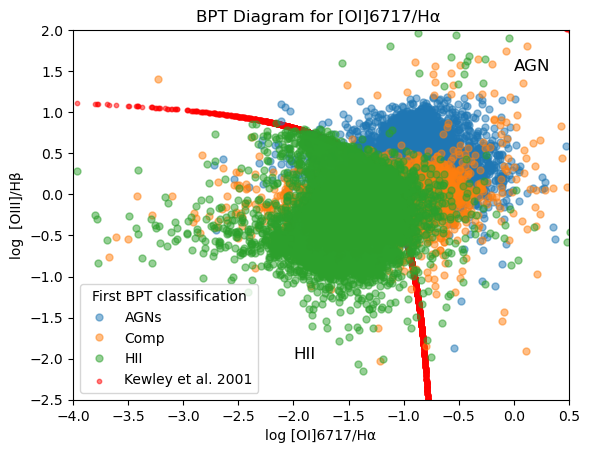

In [23]:
#Plotting the BPT diagram based on the first BPT classification.

x=np.log10(r_oi_ha)
y=np.log10(r_oiii_hb)
labels=df['label_nii']

df4 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df4.groupby('label')

# Plot

plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.scatter(np.log10(r_oi_ha),(y_kw_o), label='Kewley et al. 2001',color='red', s=10, alpha=0.5)
plt.xlabel("log [OI]6717/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram for [OI]6717/Hα ")

plt.text( 0.0,1.5, 'AGN',fontsize=12)
plt.text( -2.0,-2.0, 'HII',fontsize=12)

plt.xlim(-4,0.5)
plt.ylim(-2.5,2)

plt.legend(title='First BPT classification')

# Labeling of regions based on [OIII]λ5007/Hβ vs. [NII]λ6584/Hα

Text(0.5, 1.0, 'Classification based on [OIII]λ5007/Hβ vs. [NII]λ6584/Hα')

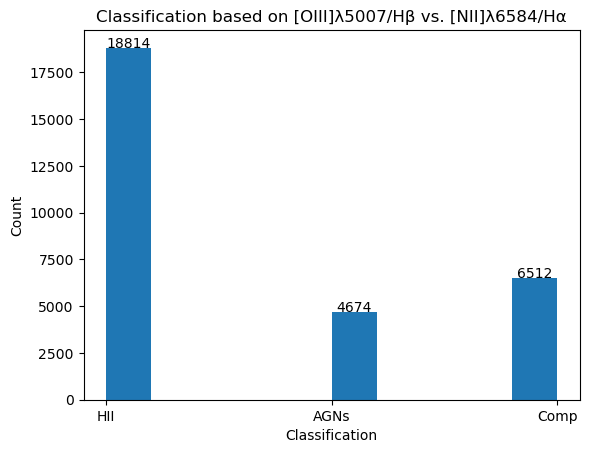

In [24]:
counts, bins, patches=plt.hist(df['label_nii'])

for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
    
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("Classification based on [OIII]λ5007/Hβ vs. [NII]λ6584/Hα")    

# Labeling based on [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα

Text(0.5, 1.0, 'Classification based on [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα')

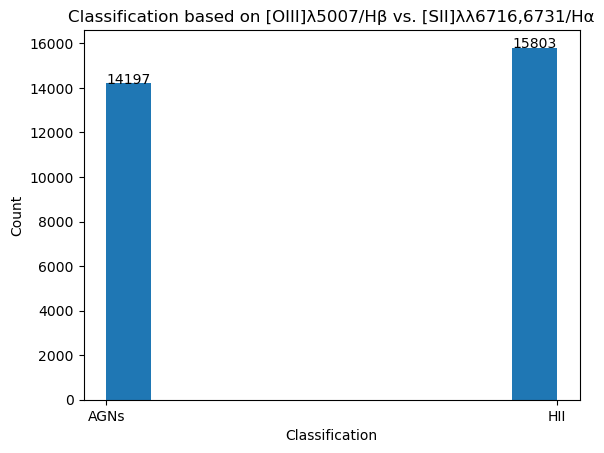

In [25]:
counts, bins, patches = plt.hist(df['label_sii'])

for i in range(len(patches)):
    if counts[i] != 0:  # Only add text for non-zero counts
        plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')

plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("Classification based on [OIII]λ5007/Hβ vs. [SII]λλ6716,6731/Hα")


# Labeling based on [OIII]λ5007/Hβ  vs.  [OI]λ6300/Hα.

Text(0.5, 1.0, 'Classification based on [OIII]λ5007/Hβ vs. [OI]λ6300/Hα')

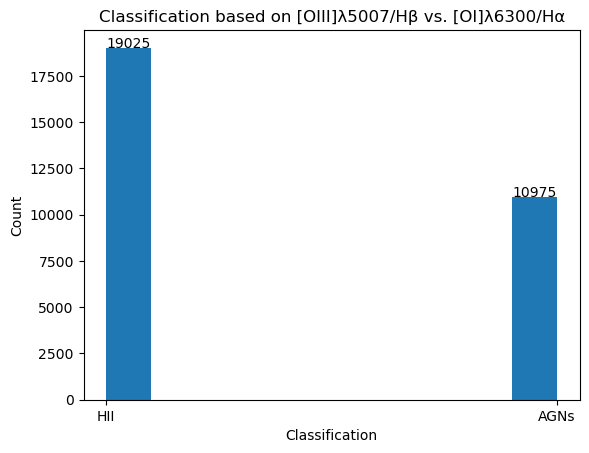

In [26]:
counts, bins, patches=plt.hist(df['label_oi'])
for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
plt.xlabel("Classification")
plt.ylabel("Count") 
plt.title("Classification based on [OIII]λ5007/Hβ vs. [OI]λ6300/Hα") 

# Overlay of histograms to compare classification based on the 3 BPT diagrams

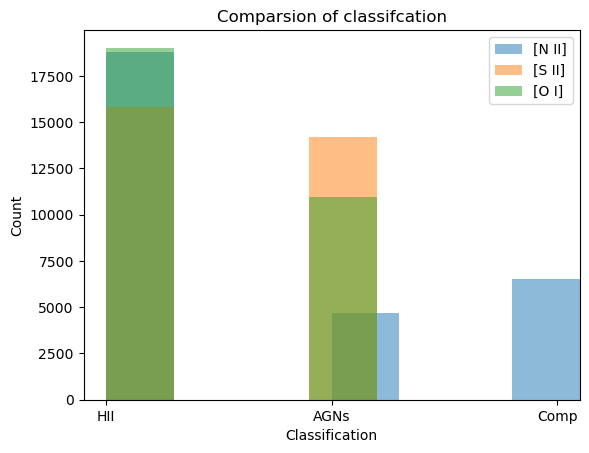

In [27]:
plt.hist(df['label_nii'],width=0.3,alpha=0.5, label='[N II]')
plt.hist(df['label_sii'],width=0.3, alpha=0.5,label='[S II]' )
plt.hist(df['label_oi'],width=0.3, alpha=0.5, label = '[O I]')
plt.xlabel("Classification")
plt.ylabel("Count") 
plt.title("Comparsion of classifcation") 
plt.legend()

In [28]:
# Creating boolean mask for each BPT classification. 
mask_column1 = df['label_nii'] == 'AGNs'
mask_column2 = df['label_sii'] == 'AGNs'
mask_column3 = df['label_oi'] == 'AGNs'
matches_agn = df[mask_column1 & mask_column2 & mask_column3]
count_agn = matches_agn.shape[0]

print("The number of objects classifies as AGN in all 3 BPT diagrams are=",count_agn)

 
mask_column1 = df['label_nii'] == 'HII'
mask_column2 = df['label_sii'] == 'HII'
mask_column3 = df['label_oi'] == 'HII'
matches_hii = df[mask_column1 & mask_column2 & mask_column3]
count_hii = matches_hii.shape[0]

print("The number of objects classifies as HII in all 3 BPT diagrams are=",count_hii)



The number of objects classifies as AGN in all 3 BPT diagrams are= 4513
The number of objects classifies as HII in all 3 BPT diagrams are= 12923


TASK 1b:

Make a WHAN diagram, the equivalent width of Hα (W Hα ) vs. [N II]/Hα ratio, for the objects
already classified (keep the same notation, i.e. the classification information obtained in the BPT
diagram). Comment and discuss the obtained results, give the number/percentage of objects
classified as (strong) AGN/Seyferts by the BPT and WHAN diagrams.

In [29]:
# Calulate ratio
r_nii_ha=df['nii_6584_flux']/df['h_alpha_flux']

x1=(df['h_alpha_eqw'])*(-1)  #Because the eq. width is negative. To make it positive. 


Five classes of galaxies are identified within the WHAN diagram:

• Pure star forming galaxies: log[N ii]/Hα < −0.4 and WHα > 3 Å

• Strong AGN (i.e., Seyferts): log[N ii]/Hα > −0.4 and WHα > 6 Å

• Weak AGN: log[N ii]/Hα > −0.4 and WHα between 3 and 6 Å

• Retired galaxies (i.e., fake AGN): WHα < 3 Å

• Passive galaxies (actually, line-less galaxies): WHα and W[N ii] < 0.5 Å

Reference:

https://academic.oup.com/mnras/article/413/3/1687/964366

https://arxiv.org/pdf/1012.4426.pdf

<Figure size 1100x800 with 0 Axes>

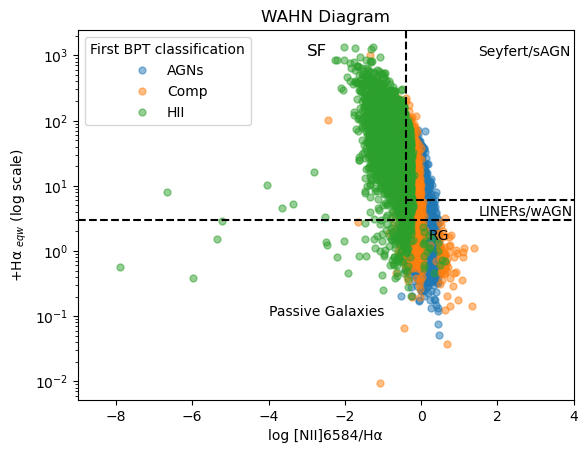

In [30]:
#Plot the WHAN diagram based on the first BPT classification

y=x1
x=np.log10(r_nii_ha)
labels=df['label_nii']

df5 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df5.groupby('label')

# Plot
plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.xlim(-9,4.0)
#plt.ylim(-2.0,4.0) 
plt.yscale('log')
plt.xlabel("log [NII]6584/Hα")
plt.ylabel("+Hα $_{eqw}$ (log scale)")
plt.title("WAHN Diagram")

# Classification based on fig 6. from https://arxiv.org/pdf/1012.4426.pdf

plt.axvline(x=-0.4,ymin=0.5, color='black', linestyle='--')
#plt.axhline(y=0.5, color='black', linestyle='--')
plt.axhline(y=6, xmin=0.66,color='black', linestyle='--')
plt.axhline(y=3,color='black', linestyle='--')

plt.text( -3.0,1000.0, 'SF',fontsize=12)
plt.text( 1.5,1000.0, 'Seyfert/sAGN',fontsize=10)
plt.text( 1.5,3.5, 'LINERs/wAGN',fontsize=10)
plt.text( -4,0.1, 'Passive Galaxies',fontsize=10)
plt.text( 0.2,1.5, 'RG',fontsize=10)
plt.legend(title='First BPT classification')

In [31]:
#Creating the WHAN classification

df['WHAN classification'] = ''
for i in range(len(df)):
    if (np.log10(r_nii_ha)[i]<-0.4) & (x1[i]>3.0):
        df['WHAN classification'][i] = 'SF'
    elif (np.log10(r_nii_ha)[i]>-0.4) & (x1[i]>6.0):
        df['WHAN classification'][i] = 'sAGNs' 
    elif (np.log10(r_nii_ha[i])>-0.4) & (6.0>=x1[i] >=3.0):
        df['WHAN classification'][i] = 'wAGNs'
    #elif (x1[i]<0.5):
    #    df['WHAN classification'][i] = 'Passive Galaxies'
    #elif (x1[i]<3.0): 
    else:
        df['WHAN classification'][i] = 'RG'
    #else:
    #    df['WHAN classification'][i] = 'Passive Galaxies'
df

/tmp/ipykernel_41726/519987598.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WHAN classification'][i] = 'SF'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii,label_sii,label_oi,WHAN classification
0,273,51957,80,0.058401,158.97334,-0.056495,16.694170,13.69125,22.067870,15.683690,3.748192,70.74951,21.835280,-14.402820,37.751560,HII,AGNs,HII,SF
1,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,4.397604,281.69470,75.784330,-41.025360,104.490310,HII,HII,HII,SF
2,287,52023,526,0.069357,183.35021,1.173506,25.557340,87.21746,54.145850,39.409870,7.337140,261.62160,63.729020,-30.747560,93.555720,HII,HII,HII,SF
3,294,51986,100,0.137887,196.98609,-0.997912,20.347000,93.98420,39.608480,35.300930,3.212363,253.34840,56.194160,-34.919730,74.909410,HII,HII,HII,SF
4,304,51609,98,0.054087,215.54901,-0.131283,39.679030,198.26330,101.714300,68.725940,12.698290,524.29320,122.818400,-30.082180,170.440240,HII,HII,HII,SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,0.507703,16.09101,1.122258,-1.226471,10.366593,AGNs,AGNs,AGNs,RG
29996,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,3.427518,152.24690,43.673450,-17.958430,56.982090,HII,AGNs,HII,SF
29997,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,2.628289,63.83286,13.129680,-5.678198,16.814076,HII,HII,HII,wAGNs
29998,896,52592,197,0.144802,131.10921,42.940794,79.731410,267.32160,117.599900,85.356190,19.219920,738.98460,190.633200,-51.559060,202.956090,HII,HII,HII,SF


### 'WHAN classification' column has the classification basedon the WHAN criteria

In [32]:
# Count of classification
df['WHAN classification'].value_counts()

SF       15174
sAGNs     7772
RG        4480
wAGNs     2574
Name: WHAN classification, dtype: int64

<Figure size 1100x800 with 0 Axes>

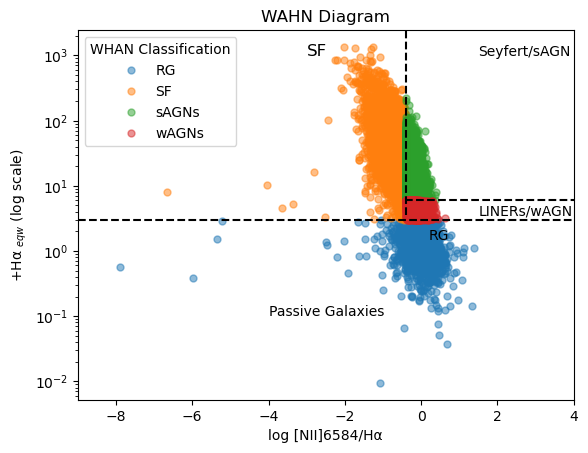

In [33]:
#Plotting based on WHAN classification

y=x1
x=np.log10(r_nii_ha)
labels=df['WHAN classification']

df5 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df5.groupby('label')

# Plot

plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.xlim(-9,4.0)
#plt.ylim(-2.0,4.0) 
plt.yscale('log')
plt.xlabel("log [NII]6584/Hα")
plt.ylabel("+Hα $_{eqw}$ (log scale)")
plt.title("WAHN Diagram")

# Classification based on fig 6. from https://arxiv.org/pdf/1012.4426.pdf

plt.axvline(x=-0.4,ymin=0.5, color='black', linestyle='--')
#plt.axhline(y=0.5, color='black', linestyle='--')
plt.axhline(y=6, xmin=0.66,color='black', linestyle='--')
plt.axhline(y=3,color='black', linestyle='--')

plt.text( -3.0,1000.0, 'SF',fontsize=12)
plt.text( 1.5,1000.0, 'Seyfert/sAGN',fontsize=10)
plt.text( 1.5,3.5, 'LINERs/wAGN',fontsize=10)
plt.text( -4,0.1, 'Passive Galaxies',fontsize=10)
plt.text( 0.2,1.5, 'RG',fontsize=10)
plt.legend(title='WHAN Classification')

I have't found any passive galaxies from the classification criteria. 

Text(0.5, 1.0, 'Classification based on [OIII]λ5007/Hβ vs. [NII]λ6584/Hα')

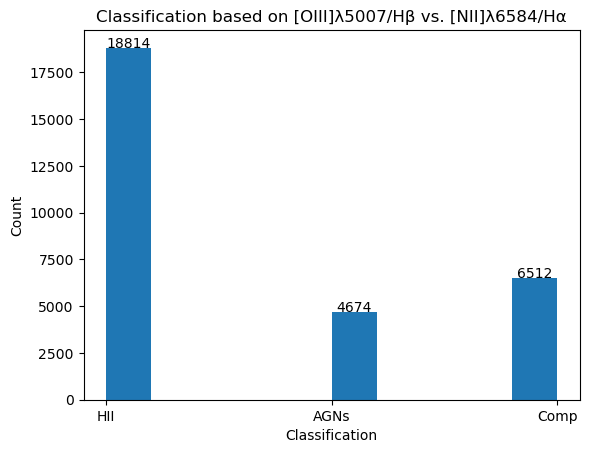

In [34]:
# Histogram of First BPT Classification

counts, bins, patches=plt.hist(df['label_nii'])

for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
    
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("Classification based on [OIII]λ5007/Hβ vs. [NII]λ6584/Hα") 

Text(0.5, 1.0, 'WHAN classification')

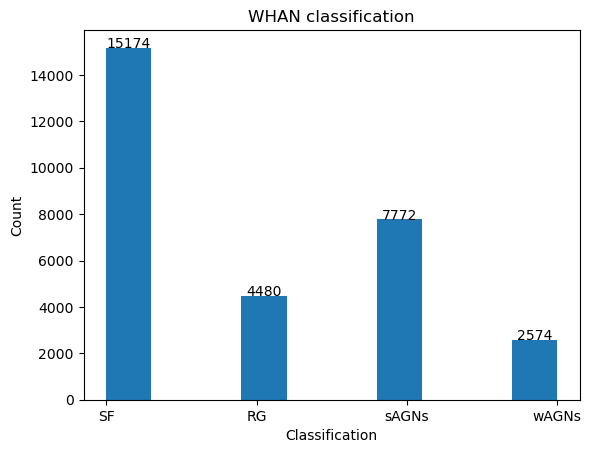

In [35]:
# Histogram of WHAN Classification

counts, bins, patches=plt.hist(df['WHAN classification'])

for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
    
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("WHAN classification") 

Text(0.5, 1.0, 'Comparsion of WHAN and fist BPT classifcation')

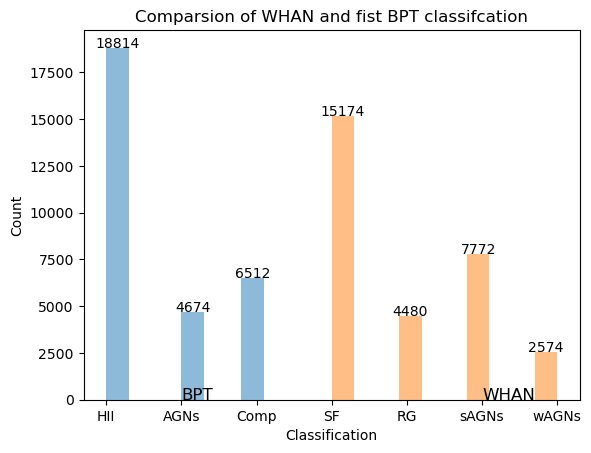

In [36]:
# Comparison of BPT and WHAN classification

counts, bins, patches=plt.hist(df['label_nii'],width=0.3,alpha=0.5)
for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')

counts, bins, patches=plt.hist(df['WHAN classification'],width=0.3,alpha=0.5)
for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
plt.text( 5.0,6.0, 'WHAN',fontsize=12)
plt.text( 1.0,1.0, 'BPT',fontsize=12)
plt.xlabel("Classification")
plt.ylabel("Count") 
plt.title("Comparsion of WHAN and fist BPT classifcation") 

In [37]:
# Creating boolean mask for each BPT classification. 
mask_column1 = df['label_nii'] == 'AGNs'
mask_column2 = df['label_sii'] == 'AGNs'
mask_column3 = df['label_oi'] == 'AGNs'
mask_column4 = df['WHAN classification'] == 'sAGNs'
#mask_column5 = df['WHAN classification'] == 'wAGNs'
matches_agns = df[mask_column1 & mask_column2 & mask_column3 & mask_column4]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in all 3 BPT diagrams and WAHN diagram are=",count_agns)

 
mask_column1 = df['label_nii'] == 'HII'
mask_column2 = df['label_sii'] == 'HII'
mask_column3 = df['label_oi'] == 'HII'
mask_column4 = df['WHAN classification'] == 'SF'
matches_hii = df[mask_column1 & mask_column2 & mask_column3 & mask_column4]
count_hii = matches_hii.shape[0]

print("The number of objects classifies as HII in all 3 BPT diagrams and WAHN diagram are=",count_hii)


The number of objects classifies as AGN in all 3 BPT diagrams and WAHN diagram are= 987
The number of objects classifies as HII in all 3 BPT diagrams and WAHN diagram are= 9361


In [38]:
# Creating boolean mask for each BPT classification. 
mask_column1 = df['label_nii'] == 'AGNs'
#mask_column2 = df['label_sii'] == 'AGNs'
#mask_column3 = df['label_oi'] == 'AGNs'
mask_column4 = df['WHAN classification'] == 'sAGNs'
#mask_column5 = df['WHAN classification'] == 'wAGNs'
matches_agns = df[mask_column1 & mask_column4]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in first BPT diagram and WAHN diagram are=",count_agns)

 
mask_column1 = df['label_nii'] == 'HII'
#mask_column2 = df['label_sii'] == 'HII'
#mask_column3 = df['label_oi'] == 'HII'
mask_column4 = df['WHAN classification'] == 'SF'
matches_hii = df[mask_column1 & mask_column4]
count_hii = matches_hii.shape[0]

print("The number of objects classifies as HII iin first BPT diagram and WAHN diagram are=",count_hii)

The number of objects classifies as AGN in first BPT diagram and WAHN diagram are= 991
The number of objects classifies as HII iin first BPT diagram and WAHN diagram are= 14999


TASK 2:

For a subsample of these SDSS objects, there are also [Ne III] λ3869 and [O II] λλ3726,3729 line
fluxes available (tip: set S/N ratio to at least 5). Extract that subsample from the first sample,
together with their g, z magnitudes and above line fluxes. Make the BPT and TBT diagrams for this
subsample, keeping the same notation (i.e. use the classification information obtained in the BPT
diagram for the TBT diagram). The observed magnitudes should be transformed to the z=0 frame
using k-correction (Chilingarian et al. 2010, website: http://kcor.sai.msu.ru/ or Blanton & Roweis
2007, website: http://howdy.physics.nyu.edu/index.php/Kcorrect).

The division line on the TBT diagram is as follows:

(g-z)0 = -1.2 x log([NeIII]/[OII]) - 0.4

where (g-z)0 is the rest-frame g-z color, [NeIII] is the line flux of [Ne III] λ3869 and [OII] is the line
flux of the [OII] λλ3726,3729 doublet (sometimes labeled as [OII] λ3727 when the doublet
components are not resolved).

Comment on what is the number/percentage of objects defined as AGN by BPT, TBT and both
BPT and TBT diagrams.

# Query 2 in SDSS

For getting g and z mag

SELECT 

p.objid,s.plate, s.mjd, s.fiberid,p.psfMag_g,p.psfMag_z

FROM PhotoObj AS p

JOIN SpecObj AS s ON s.bestobjid = p.objid

WHERE

s.class = "GALAXY"

AND s.z < 0.3

AND s.snmedian_g >5

In [39]:
#Read the data

df6=pd.read_csv('/home/sagarika/belgrade/agn/project/psf_mag.csv')  #This has only g and z mag
df6


,plate,mjd,fiberid,psfMag_g,psfMag_z
0,2841,54451,295,11.196440,9.417487
1,3005,54876,282,11.109890,9.862597
2,3000,54843,319,9.898472,10.042130
3,3005,54876,173,11.843290,10.791550
4,3000,54843,423,10.570940,11.495310
...,...,...,...,...,...
499952,8872,57422,728,21.737030,23.059680
499953,8732,57418,650,21.388520,23.075860
499954,266,51630,592,25.016520,23.085490
499955,266,51630,55,24.943880,23.473900


In [40]:
# Merge this data frame with the previous one

df7 = pd.merge(df, df6, on=['plate', 'mjd', 'fiberid'])
df7     

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,h_alpha_flux,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii,label_sii,label_oi,WHAN classification,psfMag_g,psfMag_z
0,280,51612,15,0.094792,171.35128,-0.960892,42.822130,80.96894,60.464140,44.026170,...,281.69470,75.784330,-41.025360,104.490310,HII,HII,HII,SF,19.88534,18.84797
1,311,51665,402,0.037270,227.37021,1.003418,243.445400,34.96292,54.669600,37.408280,...,328.80390,108.508000,-50.830560,92.077880,HII,AGNs,AGNs,SF,19.81806,18.91634
2,331,52368,254,0.064035,179.73032,-3.582669,28.017490,95.98521,51.005290,40.107660,...,243.09030,58.974290,-20.214740,91.112950,HII,HII,HII,SF,18.82746,17.73624
3,339,51692,406,0.095320,196.32980,-1.536161,17.931210,42.66681,18.518980,12.744700,...,28.06836,4.507135,-1.324470,31.263680,AGNs,AGNs,AGNs,RG,18.71338,16.97744
4,367,51997,329,0.125732,258.99729,56.661704,26.671620,186.47410,63.394950,47.301840,...,524.48370,108.752400,-26.807350,110.696790,HII,HII,HII,SF,18.80992,17.53538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18713,861,52318,373,0.143304,123.28559,32.548786,11.471230,38.09672,16.855620,11.903530,...,109.88770,30.453730,-18.187900,28.759150,HII,HII,HII,SF,20.92002,19.42937
18714,876,52669,358,0.130868,161.24746,50.583001,9.590372,17.45843,4.773553,5.593040,...,16.09101,1.122258,-1.226471,10.366593,AGNs,AGNs,AGNs,RG,19.37969,17.56364
18715,883,52430,83,0.090381,183.77579,51.473857,33.699040,51.01481,33.192550,23.789540,...,152.24690,43.673450,-17.958430,56.982090,HII,AGNs,HII,SF,19.65498,18.35074
18716,890,52583,71,0.094437,118.70726,31.912619,5.013464,27.23996,10.933600,5.880476,...,63.83286,13.129680,-5.678198,16.814076,HII,HII,HII,wAGNs,19.64425,18.05438


# Query 3 in SDSS

For getting NIII and OII lines


SELECT 

s.plate, s.mjd, s.fiberid,

g.neiii_3869_flux,g.oii_3726_flux,g.oii_3729_flux

FROM SpecObj AS s

JOIN GalSpecLine AS g ON s.specobjid = g.specobjid

WHERE

g.neiii_3869_eqw<0

AND g.oii_3726_eqw<0

AND g.oii_3729_eqw<0


AND g.neiii_3869_flux>0

AND g.oii_3726_flux>0

AND g.oii_3729_flux>0

AND s.class = "GALAXY"

AND s.z < 0.3

AND s.snmedian_g >5

In [41]:
#Read the data

df8=pd.read_csv('/home/sagarika/belgrade/agn/project/extra_lines.csv')  #This has Ne and the OII lines
df8

,plate,mjd,fiberid,neiii_3869_flux,oii_3726_flux,oii_3729_flux
0,1802,53885,518,7.057686,63.536980,85.511660
1,1813,53903,124,11.422500,5.294203,7.712016
2,2109,53468,334,0.084278,8.957530,13.020820
3,510,52381,230,70.066260,157.438100,140.786200
4,2352,53770,15,3.677223,10.607540,19.747040
...,...,...,...,...,...,...
287085,1558,53271,443,5.016888,10.032220,23.120520
287086,605,52353,44,15.567200,100.427400,132.135200
287087,2775,54535,359,6.324663,19.547830,24.439670
287088,1561,53032,85,1.862574,69.198160,60.228510


In [42]:
#merged data again

df9 = pd.merge(df7, df8, on=['plate', 'mjd', 'fiberid'])
df9     

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,sii_doublet,label_nii,label_sii,label_oi,WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3726_flux,oii_3729_flux
0,311,51665,402,0.037270,227.370210,1.003418,243.445400,34.96292,54.66960,37.408280,...,92.077880,HII,AGNs,AGNs,SF,19.81806,18.91634,25.044300,220.220400,245.463100
1,339,51692,406,0.095320,196.329800,-1.536161,17.931210,42.66681,18.51898,12.744700,...,31.263680,AGNs,AGNs,AGNs,RG,18.71338,16.97744,4.392020,16.680110,35.824690
2,406,51876,395,0.193913,35.256358,0.470130,73.592820,137.04840,70.55151,48.153120,...,118.704630,HII,HII,HII,SF,19.65715,18.72096,3.088053,106.965400,96.179200
3,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.72810,24.607480,...,57.335580,HII,HII,HII,sAGNs,19.88790,18.05192,2.729951,23.853460,29.915240
4,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.27163,16.422590,...,41.694220,HII,HII,HII,SF,20.03990,18.51648,1.666590,7.096591,16.927030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11609,851,52376,473,0.096616,199.256880,4.921759,64.463010,71.74648,31.83153,24.341980,...,56.173510,AGNs,AGNs,AGNs,wAGNs,19.47640,17.78167,11.833360,37.303600,43.308110
11610,861,52318,373,0.143304,123.285590,32.548786,11.471230,38.09672,16.85562,11.903530,...,28.759150,HII,HII,HII,SF,20.92002,19.42937,2.310661,9.865284,18.829810
11611,883,52430,83,0.090381,183.775790,51.473857,33.699040,51.01481,33.19255,23.789540,...,56.982090,HII,AGNs,HII,SF,19.65498,18.35074,8.136217,36.855110,26.752020
11612,890,52583,71,0.094437,118.707260,31.912619,5.013464,27.23996,10.93360,5.880476,...,16.814076,HII,HII,HII,wAGNs,19.64425,18.05438,5.160082,9.741384,8.165585


In [43]:
#For oxygen doublet
df9['oii_doublet']=df9['oii_3726_flux']+df9['oii_3729_flux']
df9

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,label_nii,label_sii,label_oi,WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3726_flux,oii_3729_flux,oii_doublet
0,311,51665,402,0.037270,227.370210,1.003418,243.445400,34.96292,54.66960,37.408280,...,HII,AGNs,AGNs,SF,19.81806,18.91634,25.044300,220.220400,245.463100,465.683500
1,339,51692,406,0.095320,196.329800,-1.536161,17.931210,42.66681,18.51898,12.744700,...,AGNs,AGNs,AGNs,RG,18.71338,16.97744,4.392020,16.680110,35.824690,52.504800
2,406,51876,395,0.193913,35.256358,0.470130,73.592820,137.04840,70.55151,48.153120,...,HII,HII,HII,SF,19.65715,18.72096,3.088053,106.965400,96.179200,203.144600
3,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.72810,24.607480,...,HII,HII,HII,sAGNs,19.88790,18.05192,2.729951,23.853460,29.915240,53.768700
4,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.27163,16.422590,...,HII,HII,HII,SF,20.03990,18.51648,1.666590,7.096591,16.927030,24.023621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11609,851,52376,473,0.096616,199.256880,4.921759,64.463010,71.74648,31.83153,24.341980,...,AGNs,AGNs,AGNs,wAGNs,19.47640,17.78167,11.833360,37.303600,43.308110,80.611710
11610,861,52318,373,0.143304,123.285590,32.548786,11.471230,38.09672,16.85562,11.903530,...,HII,HII,HII,SF,20.92002,19.42937,2.310661,9.865284,18.829810,28.695094
11611,883,52430,83,0.090381,183.775790,51.473857,33.699040,51.01481,33.19255,23.789540,...,HII,AGNs,HII,SF,19.65498,18.35074,8.136217,36.855110,26.752020,63.607130
11612,890,52583,71,0.094437,118.707260,31.912619,5.013464,27.23996,10.93360,5.880476,...,HII,HII,HII,wAGNs,19.64425,18.05438,5.160082,9.741384,8.165585,17.906969


In [44]:
#Calculate line ratios

ra_nii_ha=df9['nii_6584_flux']/df9['h_alpha_flux']   #Line ratio of [NII]/Hα

ra_oiii_hb=df9['oiii_5007_flux']/df9['h_beta_flux']    #Line ratio of [OIII]/Hβ

#ra_neiii_oii=df9['neiii_3869_flux']/df9['oii_3729_flux']
ra_neiii_oii=df9['neiii_3869_flux']/df9['oii_doublet']

In [45]:
#from https://arxiv.org/pdf/astro-ph/0106324.pdf  Kewley et al 2001
y_kw=(0.61/(np.log10(ra_nii_ha)-0.47)) +1.19



#from https://arxiv.org/pdf/astro-ph/0304239.pdf  'Kauffmann et al. 2003'
y_kf=(0.61/(np.log10(ra_nii_ha)-0.05)) +1.3

<Figure size 1100x800 with 0 Axes>

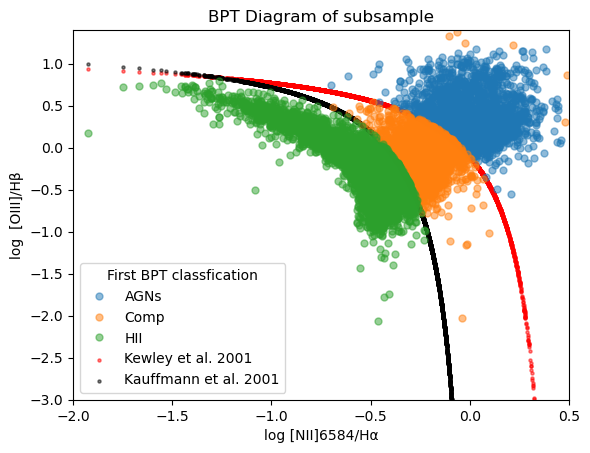

In [46]:
#Plot BPT diagram

x=np.log10(ra_nii_ha)
y=np.log10(ra_oiii_hb)
labels=df9['label_nii']

df10 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df10.groupby('label')

# Plot

plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.scatter(np.log10(ra_nii_ha),(y_kw), label='Kewley et al. 2001',color='red', s=5, alpha=0.5)
plt.scatter(np.log10(ra_nii_ha),(y_kf), label='Kauffmann et al. 2001',color='black', s=5, alpha=0.5)
plt.xlabel("log [NII]/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram")

#plt.text( 0.0,1.5, 'AGN',fontsize=12)
#plt.text( -2.0,-2.0, 'HII',fontsize=12)

plt.xlim(-2,0.5)
plt.ylim(-3,1.4)

plt.xlabel("log [NII]6584/Hα")
plt.ylabel("log  [OIII]/Hβ")
plt.title("BPT Diagram of subsample")


plt.legend(title='First BPT classfication')

In [47]:
#g_z=df9['petroMag_g']-df9['petroMag_z']
# Difference in g mag and z mag
g_z=df9['psfMag_g']-df9['psfMag_z']

# K correction code 

In [48]:
def calc_kcor(filter_name, redshift, colour_name, colour_value):
    """
    K-corrections calculator in Python. See http://kcor.sai.msu.ru for the 
    reference. Available filter-colour combinations must be present in the 
    `coeff` dictionary keys.

    @type   filter_name: string    
    @param  filter_name: Name of the filter to calculate K-correction for, e.g. 
                         'u', 'g', 'r' for some of the SDSS filters, or 'J2', 
                         'H2', 'Ks2' for 2MASS filters (must be present in 
                         `coeff` dictionary)
    @type      redshift: float    
    @param     redshift: Redshift of a galaxy, should be between 0.0 and 0.5 (no
                         check is made, however)
    @type   colour_name: string    
    @param  colour_name: Human name of the colour, e.g. 'u - g', 'g - r', 
                         'V - Rc', 'J2 - Ks2' (must be present in `coeff` dictionary)
    @type  colour_value: float    
    @param colour_value: Value of the galaxy's colour, specified in colour_name    
    @rtype:              float
    @return:             K-correction in specified filter for given redshift and 
                         colour
    @version:            2012
    @author:             Chilingarian, I., Melchior. A.-L., and Zolotukhin, I.
    @license:            Simplified BSD license, see http://kcor.sai.msu.ru/license.txt

    Usage example:
    
        >>> calc_kcor('g', 0.2, 'g - r', 1.1)
        0.5209713975999992
        >>> calc_kcor('Ic', 0.4, 'V - Ic', 2.0)
        0.310069919999993
        >>> calc_kcor('H', 0.5, 'H - K', 0.1)
        -0.14983142499999502
        
    """
    coeff = {

        'B_BRc': [
            [0,0,0,0],
            [-1.99412,3.45377,0.818214,-0.630543],
            [15.9592,-3.99873,6.44175,0.828667],
            [-101.876,-44.4243,-12.6224,0],
            [299.29,86.789,0,0],
            [-304.526,0,0,0],
        ],
        
        'B_BIc': [
            [0,0,0,0],
            [2.11655,-5.28948,4.5095,-0.8891],
            [24.0499,-4.76477,-1.55617,1.85361],
            [-121.96,7.73146,-17.1605,0],
            [236.222,76.5863,0,0],
            [-281.824,0,0,0],
        ],

        'H2_H2Ks2': [
            [0,0,0,0],
            [-1.88351,1.19742,10.0062,-18.0133],
            [11.1068,20.6816,-16.6483,139.907],
            [-79.1256,-406.065,-48.6619,-430.432],
            [551.385,1453.82,354.176,473.859],
            [-1728.49,-1785.33,-705.044,0],
            [2027.48,950.465,0,0],
            [-741.198,0,0,0],
        ],

        'H2_J2H2': [
            [0,0,0,0],
            [-4.99539,5.79815,4.19097,-7.36237],
            [70.4664,-202.698,244.798,-65.7179],
            [-142.831,553.379,-1247.8,574.124],
            [-414.164,1206.23,467.602,-799.626],
            [763.857,-2270.69,1845.38,0],
            [-563.812,-1227.82,0,0],
            [1392.67,0,0,0],
        ],

        'Ic_VIc': [
            [0,0,0,0],
            [-7.92467,17.6389,-15.2414,5.12562],
            [15.7555,-1.99263,10.663,-10.8329],
            [-88.0145,-42.9575,46.7401,0],
            [266.377,-67.5785,0,0],
            [-164.217,0,0,0],
        ],

        'J2_J2Ks2': [
            [0,0,0,0],
            [-2.85079,1.7402,0.754404,-0.41967],
            [24.1679,-34.9114,11.6095,0.691538],
            [-32.3501,59.9733,-29.6886,0],
            [-30.2249,43.3261,0,0],
            [-36.8587,0,0,0],
        ],

        'J2_J2H2': [
            [0,0,0,0],
            [-0.905709,-4.17058,11.5452,-7.7345],
            [5.38206,-6.73039,-5.94359,20.5753],
            [-5.99575,32.9624,-72.08,0],
            [-19.9099,92.1681,0,0],
            [-45.7148,0,0,0],
        ],

        'Ks2_J2Ks2': [
            [0,0,0,0],
            [-5.08065,-0.15919,4.15442,-0.794224],
            [62.8862,-61.9293,-2.11406,1.56637],
            [-191.117,212.626,-15.1137,0],
            [116.797,-151.833,0,0],
            [41.4071,0,0,0],
        ],

        'Ks2_H2Ks2': [
            [0,0,0,0],
            [-3.90879,5.05938,10.5434,-10.9614],
            [23.6036,-97.0952,14.0686,28.994],
            [-44.4514,266.242,-108.639,0],
            [-15.8337,-117.61,0,0],
            [28.3737,0,0,0],
        ],

        'Rc_BRc': [
            [0,0,0,0],
            [-2.83216,4.64989,-2.86494,0.90422],
            [4.97464,5.34587,0.408024,-2.47204],
            [-57.3361,-30.3302,18.4741,0],
            [224.219,-19.3575,0,0],
            [-194.829,0,0,0],
        ],

        'Rc_VRc': [
            [0,0,0,0],
            [-3.39312,16.7423,-29.0396,25.7662],
            [5.88415,6.02901,-5.07557,-66.1624],
            [-50.654,-13.1229,188.091,0],
            [131.682,-191.427,0,0],
            [-36.9821,0,0,0],
        ],

        'U_URc': [
            [0,0,0,0],
            [2.84791,2.31564,-0.411492,-0.0362256],
            [-18.8238,13.2852,6.74212,-2.16222],
            [-307.885,-124.303,-9.92117,12.7453],
            [3040.57,428.811,-124.492,-14.3232],
            [-10677.7,-39.2842,197.445,0],
            [16022.4,-641.309,0,0],
            [-8586.18,0,0,0],
        ],

        'V_VIc': [
            [0,0,0,0],
            [-1.37734,-1.3982,4.76093,-1.59598],
            [19.0533,-17.9194,8.32856,0.622176],
            [-86.9899,-13.6809,-9.25747,0],
            [305.09,39.4246,0,0],
            [-324.357,0,0,0],
        ],

        'V_VRc': [
            [0,0,0,0],
            [-2.21628,8.32648,-7.8023,9.53426],
            [13.136,-1.18745,3.66083,-41.3694],
            [-117.152,-28.1502,116.992,0],
            [365.049,-93.68,0,0],
            [-298.582,0,0,0],
        ],

        'FUV_FUVNUV': [
            [0,0,0,0],
            [-0.866758,0.2405,0.155007,0.0807314],
            [-1.17598,6.90712,3.72288,-4.25468],
            [135.006,-56.4344,-1.19312,25.8617],
            [-1294.67,245.759,-84.6163,-40.8712],
            [4992.29,-477.139,174.281,0],
            [-8606.6,316.571,0,0],
            [5504.2,0,0,0],
        ],

        'FUV_FUVu': [
            [0,0,0,0],
            [-1.67589,0.447786,0.369919,-0.0954247],
            [2.10419,6.49129,-2.54751,0.177888],
            [15.6521,-32.2339,4.4459,0],
            [-48.3912,37.1325,0,0],
            [37.0269,0,0,0],
        ],

        'g_gi': [
            [0,0,0,0],
            [1.59269,-2.97991,7.31089,-3.46913],
            [-27.5631,-9.89034,15.4693,6.53131],
            [161.969,-76.171,-56.1923,0],
            [-204.457,217.977,0,0],
            [-50.6269,0,0,0],
        ],

        'g_gz': [
            [0,0,0,0],
            [2.37454,-4.39943,7.29383,-2.90691],
            [-28.7217,-20.7783,18.3055,5.04468],
            [220.097,-81.883,-55.8349,0],
            [-290.86,253.677,0,0],
            [-73.5316,0,0,0],
        ],

        'g_gr': [
            [0,0,0,0],
            [-2.45204,4.10188,10.5258,-13.5889],
            [56.7969,-140.913,144.572,57.2155],
            [-466.949,222.789,-917.46,-78.0591],
            [2906.77,1500.8,1689.97,30.889],
            [-10453.7,-4419.56,-1011.01,0],
            [17568,3236.68,0,0],
            [-10820.7,0,0,0],
        ],

        'H_JH': [
            [0,0,0,0],
            [-1.6196,3.55254,1.01414,-1.88023],
            [38.4753,-8.9772,-139.021,15.4588],
            [-417.861,89.1454,808.928,-18.9682],
            [2127.81,-405.755,-1710.95,-14.4226],
            [-5719,731.135,1284.35,0],
            [7813.57,-500.95,0,0],
            [-4248.19,0,0,0],
        ],

        'H_HK': [
            [0,0,0,0],
            [0.812404,7.74956,1.43107,-10.3853],
            [-23.6812,-235.584,-147.582,188.064],
            [283.702,2065.89,721.859,-713.536],
            [-1697.78,-7454.39,-1100.02,753.04],
            [5076.66,11997.5,460.328,0],
            [-7352.86,-7166.83,0,0],
            [4125.88,0,0,0],
        ],

        'i_gi': [
            [0,0,0,0],
            [-2.21853,3.94007,0.678402,-1.24751],
            [-15.7929,-19.3587,15.0137,2.27779],
            [118.791,-40.0709,-30.6727,0],
            [-134.571,125.799,0,0],
            [-55.4483,0,0,0],
        ],

        'i_ui': [
            [0,0,0,0],
            [-3.91949,3.20431,-0.431124,-0.000912813],
            [-14.776,-6.56405,1.15975,0.0429679],
            [135.273,-1.30583,-1.81687,0],
            [-264.69,15.2846,0,0],
            [142.624,0,0,0],
        ],

        'J_JH': [
            [0,0,0,0],
            [0.129195,1.57243,-2.79362,-0.177462],
            [-15.9071,-2.22557,-12.3799,-2.14159],
            [89.1236,65.4377,36.9197,0],
            [-209.27,-123.252,0,0],
            [180.138,0,0,0],
        ],

        'J_JK': [
            [0,0,0,0],
            [0.0772766,2.17962,-4.23473,-0.175053],
            [-13.9606,-19.998,22.5939,-3.99985],
            [97.1195,90.4465,-21.6729,0],
            [-283.153,-106.138,0,0],
            [272.291,0,0,0],
        ],

        'K_HK': [
            [0,0,0,0],
            [-2.83918,-2.60467,-8.80285,-1.62272],
            [14.0271,17.5133,42.3171,4.8453],
            [-77.5591,-28.7242,-54.0153,0],
            [186.489,10.6493,0,0],
            [-146.186,0,0,0],
        ],

        'K_JK': [
            [0,0,0,0],
            [-2.58706,1.27843,-5.17966,2.08137],
            [9.63191,-4.8383,19.1588,-5.97411],
            [-55.0642,13.0179,-14.3262,0],
            [131.866,-13.6557,0,0],
            [-101.445,0,0,0],
        ],

        'NUV_NUVr': [
            [0,0,0,0],
            [2.2112,-1.2776,0.219084,0.0181984],
            [-25.0673,5.02341,-0.759049,-0.0652431],
            [115.613,-5.18613,1.78492,0],
            [-278.442,-5.48893,0,0],
            [261.478,0,0,0],
        ],

        'NUV_NUVg': [
            [0,0,0,0],
            [2.60443,-2.04106,0.52215,0.00028771],
            [-24.6891,5.70907,-0.552946,-0.131456],
            [95.908,-0.524918,1.28406,0],
            [-208.296,-10.2545,0,0],
            [186.442,0,0,0],
        ],

        'r_gr': [
            [0,0,0,0],
            [1.83285,-2.71446,4.97336,-3.66864],
            [-19.7595,10.5033,18.8196,6.07785],
            [33.6059,-120.713,-49.299,0],
            [144.371,216.453,0,0],
            [-295.39,0,0,0],
        ],

        'r_ur': [
            [0,0,0,0],
            [3.03458,-1.50775,0.576228,-0.0754155],
            [-47.8362,19.0053,-3.15116,0.286009],
            [154.986,-35.6633,1.09562,0],
            [-188.094,28.1876,0,0],
            [68.9867,0,0,0],
        ],

        'u_ur': [
            [0,0,0,0],
            [10.3686,-6.12658,2.58748,-0.299322],
            [-138.069,45.0511,-10.8074,0.95854],
            [540.494,-43.7644,3.84259,0],
            [-1005.28,10.9763,0,0],
            [710.482,0,0,0],
        ],

        'u_ui': [
            [0,0,0,0],
            [11.0679,-6.43368,2.4874,-0.276358],
            [-134.36,36.0764,-8.06881,0.788515],
            [528.447,-26.7358,0.324884,0],
            [-1023.1,13.8118,0,0],
            [721.096,0,0,0],
        ],

        'u_uz': [
            [0,0,0,0],
            [11.9853,-6.71644,2.31366,-0.234388],
            [-137.024,35.7475,-7.48653,0.655665],
            [519.365,-20.9797,0.670477,0],
            [-1028.36,2.79717,0,0],
            [767.552,0,0,0],
        ],

        'Y_YH': [
            [0,0,0,0],
            [-2.81404,10.7397,-0.869515,-11.7591],
            [10.0424,-58.4924,49.2106,23.6013],
            [-0.311944,84.2151,-100.625,0],
            [-45.306,3.77161,0,0],
            [41.1134,0,0,0],
        ],

        'Y_YK': [
            [0,0,0,0],
            [-0.516651,6.86141,-9.80894,-0.410825],
            [-3.90566,-4.42593,51.4649,-2.86695],
            [-5.38413,-68.218,-50.5315,0],
            [57.4445,97.2834,0,0],
            [-64.6172,0,0,0],
        ],

        'z_gz': [
            [0,0,0,0],
            [0.30146,-0.623614,1.40008,-0.534053],
            [-10.9584,-4.515,2.17456,0.913877],
            [66.0541,4.18323,-8.42098,0],
            [-169.494,14.5628,0,0],
            [144.021,0,0,0],
        ],

        'z_rz': [
            [0,0,0,0],
            [0.669031,-3.08016,9.87081,-7.07135],
            [-18.6165,8.24314,-14.2716,13.8663],
            [94.1113,11.2971,-11.9588,0],
            [-225.428,-17.8509,0,0],
            [197.505,0,0,0],
        ],

        'z_uz': [
            [0,0,0,0],
            [0.623441,-0.293199,0.16293,-0.0134639],
            [-21.567,5.93194,-1.41235,0.0714143],
            [82.8481,-0.245694,0.849976,0],
            [-185.812,-7.9729,0,0],
            [168.691,0,0,0],
        ],

    }

    c = coeff[filter_name + '_' + colour_name.replace(' - ', '')]
    kcor = 0.0

    for x, a in enumerate(c):
        for y, b in enumerate(c[x]):
            kcor += c[x][y] * redshift**x * colour_value**y

    return kcor
    
if __name__ == "__main__":
    import doctest
    doctest.testmod()

In [49]:
#Perform the K-correction

g_z_corr= calc_kcor('g',df9['redshift'],'g - z',g_z)
g_z_corr

0        0.047234
1        0.229833
2       -0.020186
3        0.303161
4        0.201408
           ...   
11609    0.229386
11610    0.251568
11611    0.140047
11612    0.209528
11613    0.035970
Length: 11614, dtype: float64

In [50]:
#Equation based on Trouille et al. 2011 (https://ui.adsabs.harvard.edu/abs/2011ApJ...742...46T/abstract)

y_gz = -1.2*np.log10(ra_neiii_oii) - 0.4
x_gz = (g_z_corr+0.4)/(-1.2)

In [51]:
# TBT Classification

df9['TBT classification'] = ''
for i in range(len(df9)):
    if (np.log10(ra_neiii_oii)[i]<x_gz[i]) & (g_z_corr[i]<y_gz[i]):
        df9['TBT classification'][i] = 'TBT SF' 
    else:
        df9['TBT classification'][i] = 'TBT AGN'
    
df9

#This adds a TBT classification column to the data frame

/tmp/ipykernel_41726/4062534238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['TBT classification'][i] = 'TBT SF'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,label_sii,label_oi,WHAN classification,psfMag_g,psfMag_z,neiii_3869_flux,oii_3726_flux,oii_3729_flux,oii_doublet,TBT classification
0,311,51665,402,0.037270,227.370210,1.003418,243.445400,34.96292,54.66960,37.408280,...,AGNs,AGNs,SF,19.81806,18.91634,25.044300,220.220400,245.463100,465.683500,TBT SF
1,339,51692,406,0.095320,196.329800,-1.536161,17.931210,42.66681,18.51898,12.744700,...,AGNs,AGNs,RG,18.71338,16.97744,4.392020,16.680110,35.824690,52.504800,TBT SF
2,406,51876,395,0.193913,35.256358,0.470130,73.592820,137.04840,70.55151,48.153120,...,HII,HII,SF,19.65715,18.72096,3.088053,106.965400,96.179200,203.144600,TBT SF
3,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.72810,24.607480,...,HII,HII,sAGNs,19.88790,18.05192,2.729951,23.853460,29.915240,53.768700,TBT SF
4,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.27163,16.422590,...,HII,HII,SF,20.03990,18.51648,1.666590,7.096591,16.927030,24.023621,TBT SF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11609,851,52376,473,0.096616,199.256880,4.921759,64.463010,71.74648,31.83153,24.341980,...,AGNs,AGNs,wAGNs,19.47640,17.78167,11.833360,37.303600,43.308110,80.611710,TBT SF
11610,861,52318,373,0.143304,123.285590,32.548786,11.471230,38.09672,16.85562,11.903530,...,HII,HII,SF,20.92002,19.42937,2.310661,9.865284,18.829810,28.695094,TBT SF
11611,883,52430,83,0.090381,183.775790,51.473857,33.699040,51.01481,33.19255,23.789540,...,AGNs,HII,SF,19.65498,18.35074,8.136217,36.855110,26.752020,63.607130,TBT SF
11612,890,52583,71,0.094437,118.707260,31.912619,5.013464,27.23996,10.93360,5.880476,...,HII,HII,wAGNs,19.64425,18.05438,5.160082,9.741384,8.165585,17.906969,TBT SF


In [52]:
#Count of classification

df9['TBT classification'].value_counts()

TBT SF     11001
TBT AGN      613
Name: TBT classification, dtype: int64

# TBT Diagram

Text(0.5, 1.0, 'TBT diagram')

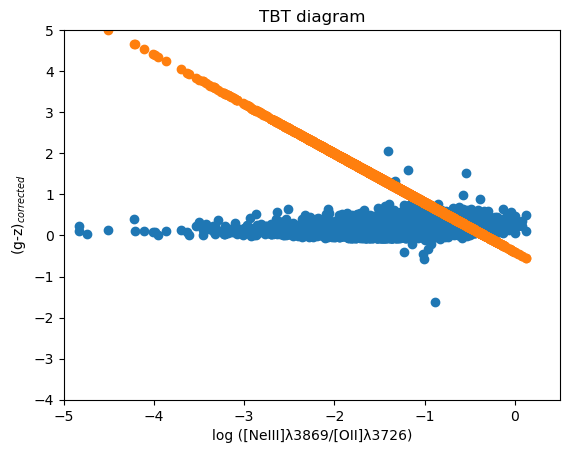

In [53]:
#Plot the TBT diagram

plt.scatter(np.log10(ra_neiii_oii),g_z_corr)
plt.scatter(np.log10(ra_neiii_oii),y_gz)

plt.xlim(-5,0.5)
plt.ylim(-4,5)


plt.xlabel('log ([NeIII]\u03BB3869/[OII]\u03BB3726)')
plt.ylabel('(g-z)$_{corrected}$')
plt.title('TBT diagram')


# TBT diagram with first BPT classification

<Figure size 1100x800 with 0 Axes>

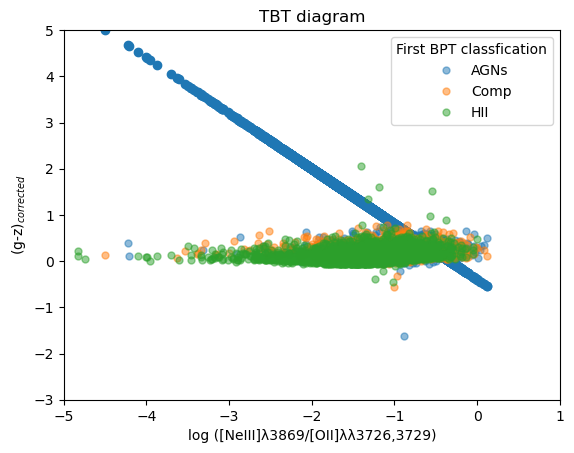

In [54]:
plt.figure(figsize=(11,8))
x=np.log10(ra_neiii_oii)
y=g_z_corr
labels=df9['label_nii']

df11 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df11.groupby('label')

# Plot

#plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
#plt.scatter(np.log10(ra_nii_ha),(y_kf), label='Kewley et al. 2001',color='red', s=10, alpha=0.5)
plt.scatter(np.log10(ra_neiii_oii),y_gz)
#plt.scatter((x_gz),g_z)
plt.xlim(-5,1)
plt.ylim(-3,5)


#plt.text( 0.0,1.5, 'AGN',fontsize=12)
#plt.text( -2.0,-2.0, 'HII',fontsize=12)


plt.xlabel('log ([NeIII]\u03BB3869/[OII]\u03BB\u03BB3726,3729)')
plt.ylabel('(g-z)$_{corrected}$')
plt.title('TBT diagram')


plt.legend(title='First BPT classfication')

### TBT classification based on the line given in paper

<Figure size 1100x800 with 0 Axes>

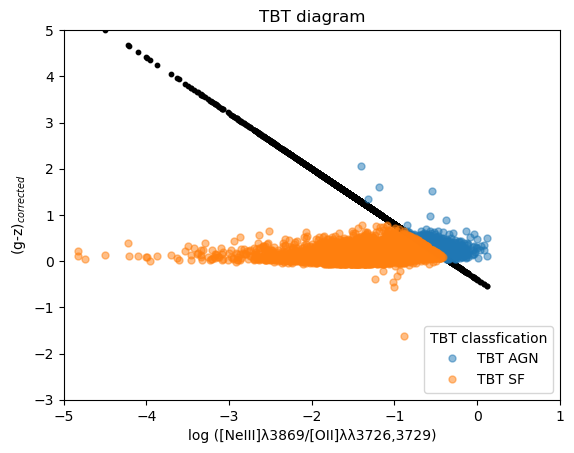

In [55]:
plt.figure(figsize=(11,8))
x=np.log10(ra_neiii_oii)
y=g_z_corr
labels=df9['TBT classification']

df11 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df11.groupby('label')

# Plot

#plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
#plt.scatter(np.log10(ra_nii_ha),(y_kf), label='Kewley et al. 2001',color='red', s=10, alpha=0.5)
plt.scatter(np.log10(ra_neiii_oii),y_gz, color='black', s=10)
#plt.scatter((x_gz),g_z)
plt.xlim(-5,1)
plt.ylim(-3,5)


#plt.text( 0.0,1.5, 'AGN',fontsize=12)
#plt.text( -2.0,-2.0, 'HII',fontsize=12)


plt.xlabel('log ([NeIII]\u03BB3869/[OII]\u03BB\u03BB3726,3729)')
plt.ylabel('(g-z)$_{corrected}$')
plt.title('TBT diagram')


plt.legend(title='TBT classfication')

### TBT diagrams based on BPT classification

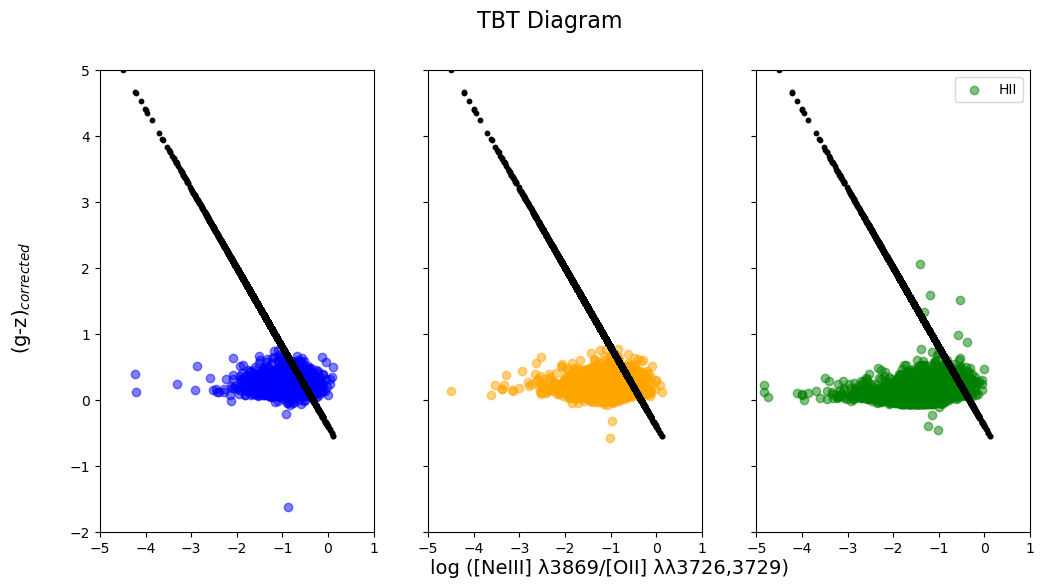

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

# define data and labels for each category
x_agn = np.log10(ra_neiii_oii[df9['label_nii'] == 'AGNs'])
y_agn = g_z_corr[df9['label_nii'] == 'AGNs']

x_comp = np.log10(ra_neiii_oii[df9['label_nii'] == 'Comp'])
y_comp = g_z_corr[df9['label_nii'] == 'Comp']

x_hii = np.log10(ra_neiii_oii[df9['label_nii'] == 'HII'])
y_hii = g_z_corr[df9['label_nii'] == 'HII']

# plot each category in a separate subplot
axs[0].scatter(x_agn, y_agn, label='AGNs',color='blue',alpha=0.5)
axs[0].scatter(np.log10(ra_neiii_oii),y_gz, color='black', s=10)

axs[1].scatter(x_comp, y_comp, label='Comp',color='orange',alpha=0.5)
axs[1].scatter(np.log10(ra_neiii_oii),y_gz, color='black', s=10)

axs[2].scatter(x_hii, y_hii, label='HII',color='green', alpha=0.5)
axs[2].scatter(np.log10(ra_neiii_oii),y_gz, color='black', s=10)

# set x and y limits for all subplots

for ax in axs:
    ax.set_xlim(-5, 1)
    ax.set_ylim(-2, 5)

# set common labels for all subplots
fig.text(0.4, 0.04, 'log ([NeIII] λ3869/[OII] λλ3726,3729)', fontsize=14)
fig.text(0.05, 0.5, '(g-z)$_{corrected}$', va='center', rotation='vertical', fontsize=14)

# add title for the whole figure
fig.suptitle('TBT Diagram', fontsize=16)

# add legend to the first subplot
#axs[0].legend(title='First BPT classification', loc='upper right')
plt.legend()

plt.show()


Text(0.5, 1.0, 'BPT (right) and TBT (left) classification')

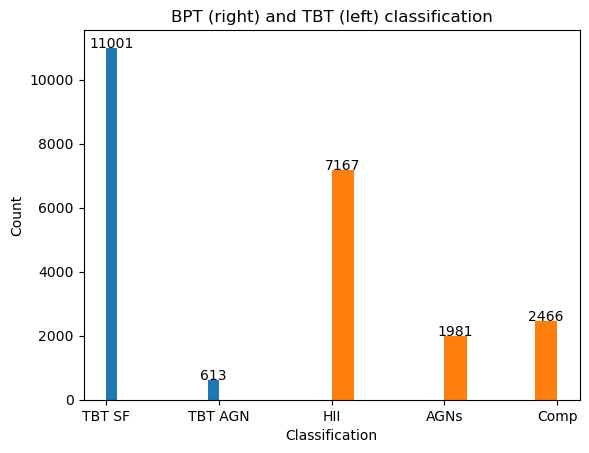

In [57]:
#Comparison of BPT and TBT classification

counts, bins, patches=plt.hist(df9['TBT classification'])

for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
    


counts, bins, patches=plt.hist(df9['label_nii'])

for i in range(len(patches)):
    if counts[i] != 0:
        plt.text(patches[i].get_x() + patches[i].get_width()/2, patches[i].get_height() + 5, f'{int(patches[i].get_height())}', ha='center')
    
plt.xlabel("Classification")
plt.ylabel("Count")
plt.title("BPT (right) and TBT (left) classification") 

In [58]:
# Creating boolean mask for each BPT classification. 
mask_column1 = df9['label_nii'] == 'AGNs'
mask_column2 = df9['TBT classification'] == 'TBT AGN'
#mask_column5 = df['WHAN classification'] == 'wAGNs'
matches_agns = df9[mask_column1 & mask_column2]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in BPT diagrams and TBT diagram are=",count_agns)

 
mask_column1 = df9['label_nii'] == 'HII'
mask_column2 = df9['TBT classification'] == 'TBT SF'

matches_hii = df9[mask_column1 & mask_column2]
count_hii = matches_hii.shape[0]

print("The number of objects classifies as HII in BPT diagram and TBT diagram are=",count_hii)


The number of objects classifies as AGN in BPT diagrams and TBT diagram are= 318
The number of objects classifies as HII in BPT diagram and TBT diagram are= 7058


In [59]:
#Paper for above 
# https://iopscience.iop.org/article/10.1088/0004-637X/742/1/46

TASK 3:

For sample of AGN selected from the SDSS database, find the WISE counterparts with a matching
tolerance of 3ʹʹ (∼ 0.5×FWHM of the WISE PSF at 3.4 μm), and get the three WISE colors
(W1,W2,W3). Locate the object on the WISE colour-colour plot using the selection criteria defined
by Mateos et al. (2012, 2013):

y = 0.315 ×

x ≡ log10(f12um/f4.6um)

y ≡ log10(f4.6um/f3.4um)

The top and bottom boundaries of the wedge are obtained by adding y-axis intercepts of +0.297
and −0.110, respectively. The MIR power-law α=−0.3 bottom-left limit corresponds to:

y = −3.172 x + 0.436

Plot your results on top of the Figure 12 taken from Wright et al. (2010).

Comment on what is the percentage of object found in both SDSS and WISE survey, what is the
number/percentage of objects defined as AGN by SDSS and WISE, as well as what is the
number/percentage of objects found to be AGN by both surveys.

# Query 4

SELECT

--count(*)

s.plate, s.mjd, s.fiberid, W.w1mpro,  W.w2mpro, W.w2mpro


FROM SpecObj as s 

JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid

JOIN wise_allsky as W on X.wise_cntr = W.cntr

WHERE

s.ra BETWEEN W.ra - 0.05 AND W.ra + 0.05

AND  s.dec BETWEEN W.dec - 0.05 AND W.dec + 0.05

In [60]:
#Read the data

df12=pd.read_csv('/home/sagarika/belgrade/agn/project/Skyserver_SQL5_6_2023 7 03 56 PM.csv')
df12

,plate,mjd,fiberid,w1mpro,w2mpro,w3mpro
0,389,51795,305,14.078,13.229,2.882
1,426,51882,74,8.035,6.989,3.532
2,1541,53732,309,14.098,10.655,3.735
3,669,52559,96,14.205,13.217,3.810
4,667,52163,216,9.535,9.146,4.562
...,...,...,...,...,...,...
499249,1472,52913,312,17.434,16.764,13.340
499250,1472,52913,639,17.396,17.499,13.343
499251,1472,52913,31,17.381,16.824,13.348
499252,6112,56191,365,15.953,15.776,13.557


In [61]:
#merged data

df13= pd.merge(df, df12, on=['plate', 'mjd', 'fiberid'])
df13    

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,h_beta_flux,h_alpha_eqw,sii_doublet,label_nii,label_sii,label_oi,WHAN classification,w1mpro,w2mpro,w3mpro
0,392,51793,20,0.081405,9.981439,-0.800023,120.928600,194.29200,114.784900,80.138080,...,166.593500,-73.840080,194.922980,HII,AGNs,HII,SF,14.774,14.452,10.639
1,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.728100,24.607480,...,29.615920,-13.367360,57.335580,HII,HII,HII,sAGNs,13.933,13.711,10.523
2,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.271630,16.422590,...,23.587120,-13.931940,41.694220,HII,HII,HII,SF,14.529,14.307,11.144
3,653,52145,303,0.121481,4.675777,-10.270538,17.909620,105.00660,43.018640,30.574330,...,38.580640,-9.574245,73.592970,Comp,HII,HII,sAGNs,13.692,13.532,10.831
4,659,52199,629,0.110844,18.493989,-9.564990,15.394230,109.88110,33.895660,27.088970,...,62.748990,-12.550150,60.984630,HII,HII,HII,sAGNs,13.539,13.288,9.589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,417,51821,525,0.141016,7.957917,16.074755,16.178780,50.88240,20.653350,15.512940,...,29.499530,-7.897447,36.166290,Comp,HII,HII,sAGNs,14.295,14.068,12.227
2972,655,52162,420,0.037475,9.951586,-9.142931,282.802500,354.93910,139.988800,104.703800,...,79.890100,-16.612640,244.692600,AGNs,AGNs,AGNs,sAGNs,12.052,11.872,8.353
2973,663,52145,363,0.117584,24.449441,-8.362747,8.606062,32.23362,6.048911,6.277849,...,12.785770,-4.746595,12.326760,Comp,HII,HII,wAGNs,14.376,14.151,12.400
2974,693,52254,21,0.250722,16.538482,-0.526522,10.428850,51.07952,20.550240,21.250280,...,26.688080,-31.046670,41.800520,HII,HII,AGNs,SF,15.789,15.501,11.565


In [62]:
# Calulate difference in magnitudes

w2_w3=df13['w2mpro']-df13['w3mpro']
w1_w2=df13['w1mpro']-df13['w2mpro']

In [63]:
# Store in data frame

df13['W2-W3']=w2_w3
df13['W1-W2']=w1_w2
df13

,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,sii_doublet,label_nii,label_sii,label_oi,WHAN classification,w1mpro,w2mpro,w3mpro,W2-W3,W1-W2
0,392,51793,20,0.081405,9.981439,-0.800023,120.928600,194.29200,114.784900,80.138080,...,194.922980,HII,AGNs,HII,SF,14.774,14.452,10.639,3.813,0.322
1,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.728100,24.607480,...,57.335580,HII,HII,HII,sAGNs,13.933,13.711,10.523,3.188,0.222
2,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.271630,16.422590,...,41.694220,HII,HII,HII,SF,14.529,14.307,11.144,3.163,0.222
3,653,52145,303,0.121481,4.675777,-10.270538,17.909620,105.00660,43.018640,30.574330,...,73.592970,Comp,HII,HII,sAGNs,13.692,13.532,10.831,2.701,0.160
4,659,52199,629,0.110844,18.493989,-9.564990,15.394230,109.88110,33.895660,27.088970,...,60.984630,HII,HII,HII,sAGNs,13.539,13.288,9.589,3.699,0.251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,417,51821,525,0.141016,7.957917,16.074755,16.178780,50.88240,20.653350,15.512940,...,36.166290,Comp,HII,HII,sAGNs,14.295,14.068,12.227,1.841,0.227
2972,655,52162,420,0.037475,9.951586,-9.142931,282.802500,354.93910,139.988800,104.703800,...,244.692600,AGNs,AGNs,AGNs,sAGNs,12.052,11.872,8.353,3.519,0.180
2973,663,52145,363,0.117584,24.449441,-8.362747,8.606062,32.23362,6.048911,6.277849,...,12.326760,Comp,HII,HII,wAGNs,14.376,14.151,12.400,1.751,0.225
2974,693,52254,21,0.250722,16.538482,-0.526522,10.428850,51.07952,20.550240,21.250280,...,41.800520,HII,HII,AGNs,SF,15.789,15.501,11.565,3.936,0.288


Text(0.5, 1.0, 'Color-Color Diagram')

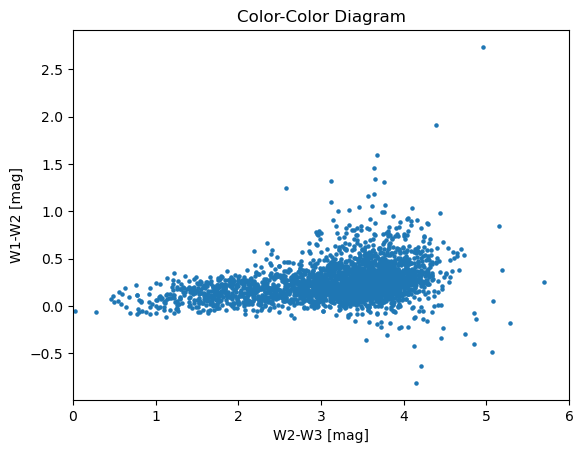

In [64]:
#Plot the color-color diagram

plt.scatter(w2_w3,w1_w2, s=5)
plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.xlim(-0,6)
#plt.ylim(-3000,500)
plt.title("Color-Color Diagram") 

In [65]:
#The equations given in Mateos et al. 2012. (https://academic.oup.com/mnras/article/426/4/3271/1017833)
#These are equations 3 and 4 given in the paper.
#The intercepts have been changed to plot the lines

y1=0.315*w2_w3

y4 = -3.172*w2_w3 + 7.624  # Values from paper
y5=0.315*w2_w3+0.796
y6=0.315*w2_w3-0.222

In [66]:
#Conditions for plotting the wedge from the given lines

condt1 = y1>y4
condt2 = y5>y4
condt3 = y6>y4
condt4 = (y4<y5) & (y4>y6)

Text(0.5, 1.0, 'Color-Color Diagram')

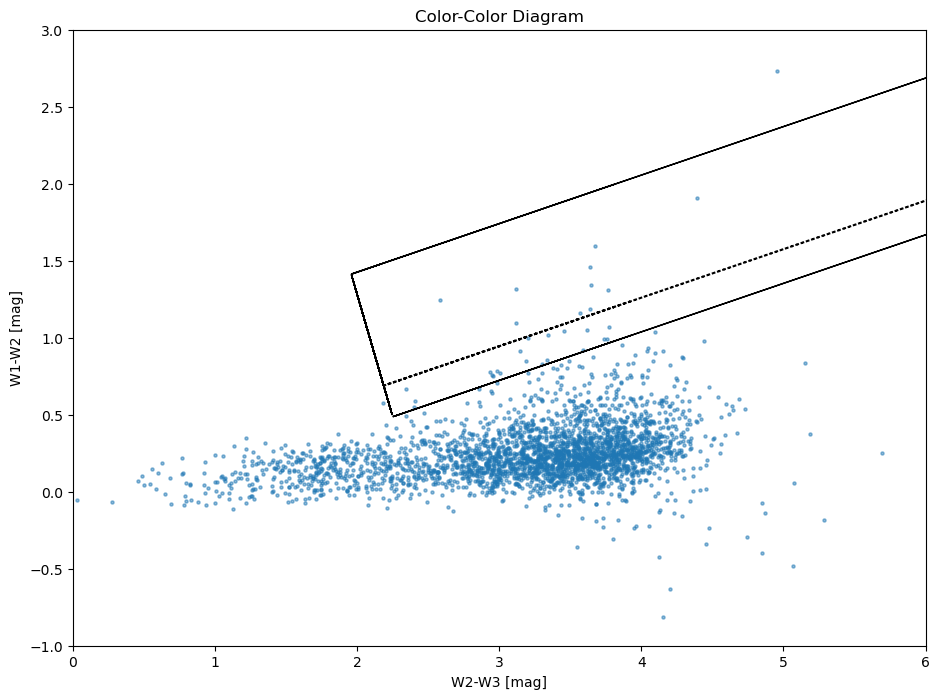

In [67]:
# Plot the Color-Color diagram

plt.figure(figsize=(11,8))
plt.scatter(w2_w3,w1_w2, s=5, alpha=0.5)

plt.plot(w2_w3[condt4],y4[condt4], color='black',linewidth=1)

    
plt.plot(w2_w3[condt2],y5[condt2], color='black',linewidth=1)
plt.plot(w2_w3[condt1],y1[condt1], color='black', linestyle= ':')
plt.plot(w2_w3[condt3],y6[condt3], color='black',linewidth=1)

plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.xlim(-0,6)
plt.ylim(-1,3)
plt.title("Color-Color Diagram") 

<Figure size 1100x800 with 0 Axes>

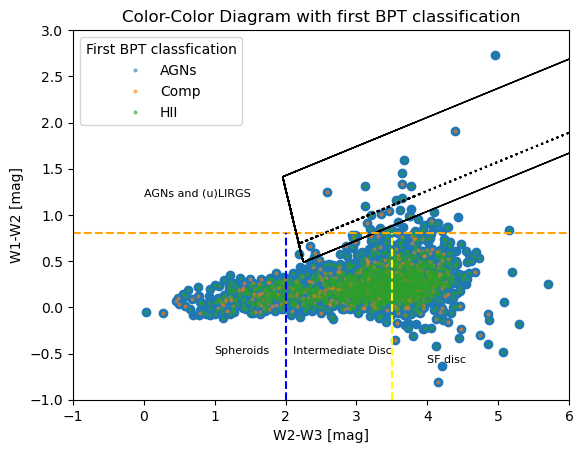

In [68]:
# Color-Color diagram based of first BPT classification

plt.figure(figsize=(11,8))
x=df13['W2-W3']
y=df13['W1-W2']
labels=df9['label_nii']

df11 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df11.groupby('label')

# Plot

#plt.figure(figsize=(11,8))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=4, label=name, alpha=0.5)
    

plt.scatter(df13['W2-W3'],df13['W1-W2'])

###The wedge for Mateos et al.#########################
plt.plot(w2_w3[condt4],y4[condt4], color='black',linewidth=1)
plt.plot(w2_w3[condt2],y5[condt2], color='black',linewidth=1)
plt.plot(w2_w3[condt1],y1[condt1], color='black', linestyle= ':')
plt.plot(w2_w3[condt3],y6[condt3], color='black',linewidth=1)
#######################################################


#Wise classification lines#############################
plt.axhline(y=0.8, color='orange', linestyle='--')
plt.axvline(x=2,ymax=0.45, color='blue', linestyle='--')
plt.axvline(x=3.5,ymax=0.45, color='yellow', linestyle='--')
plt.plot(w2_w3[condt4],y4[condt4], color='black',linewidth=1)

plt.text( 1.0,-0.5, 'Spheroids',fontsize=8)
plt.text( 2.1,-0.5, 'Intermediate Disc',fontsize=8)
plt.text( 4.0,-0.6, 'SF disc',fontsize=8)
plt.text( 0.0,1.2, 'AGNs and (u)LIRGS',fontsize=8)
##########################################################

plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.xlim(-1,6)
plt.ylim(-1,3)
plt.title("Color-Color Diagram with first BPT classification") 


plt.legend(title='First BPT classfication')

In [69]:
#The equations given in Mateos et al. 

y1=0.315*w2_w3

y4 = -3.172*w2_w3 + 7.624  # Values from paper
y5=0.315*w2_w3+0.796
y6=0.315*w2_w3-0.222

#The opposite equation for classification is

x4=(w1_w2-7.624)/(-3.172)

x5= (w1_w2-0.796)/0.315

x6=(w1_w2+0.222)/0.315

In [70]:
df13['Mateos classification'] = ''
for i in range(len(df13)):
    if  (df13['W1-W2'][i]>=y6[i]) &(df13['W1-W2'][i]<=y5[i])&(df13['W2-W3'][i]>=x4[i]):
        df13['Mateos classification'][i] = 'AGN' 
    else:
        df13['Mateos classification'][i] = 'NOT AGN'
    
df13

#This adds a column with the classification given by Mateos, S. et al. (2013)

/tmp/ipykernel_41726/1649776606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Mateos classification'][i] = 'NOT AGN'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,label_nii,label_sii,label_oi,WHAN classification,w1mpro,w2mpro,w3mpro,W2-W3,W1-W2,Mateos classification
0,392,51793,20,0.081405,9.981439,-0.800023,120.928600,194.29200,114.784900,80.138080,...,HII,AGNs,HII,SF,14.774,14.452,10.639,3.813,0.322,NOT AGN
1,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.728100,24.607480,...,HII,HII,HII,sAGNs,13.933,13.711,10.523,3.188,0.222,NOT AGN
2,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.271630,16.422590,...,HII,HII,HII,SF,14.529,14.307,11.144,3.163,0.222,NOT AGN
3,653,52145,303,0.121481,4.675777,-10.270538,17.909620,105.00660,43.018640,30.574330,...,Comp,HII,HII,sAGNs,13.692,13.532,10.831,2.701,0.160,NOT AGN
4,659,52199,629,0.110844,18.493989,-9.564990,15.394230,109.88110,33.895660,27.088970,...,HII,HII,HII,sAGNs,13.539,13.288,9.589,3.699,0.251,NOT AGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,417,51821,525,0.141016,7.957917,16.074755,16.178780,50.88240,20.653350,15.512940,...,Comp,HII,HII,sAGNs,14.295,14.068,12.227,1.841,0.227,NOT AGN
2972,655,52162,420,0.037475,9.951586,-9.142931,282.802500,354.93910,139.988800,104.703800,...,AGNs,AGNs,AGNs,sAGNs,12.052,11.872,8.353,3.519,0.180,NOT AGN
2973,663,52145,363,0.117584,24.449441,-8.362747,8.606062,32.23362,6.048911,6.277849,...,Comp,HII,HII,wAGNs,14.376,14.151,12.400,1.751,0.225,NOT AGN
2974,693,52254,21,0.250722,16.538482,-0.526522,10.428850,51.07952,20.550240,21.250280,...,HII,HII,AGNs,SF,15.789,15.501,11.565,3.936,0.288,NOT AGN


In [71]:
#Count of classification

df13['Mateos classification'].value_counts()

NOT AGN    2946
AGN          30
Name: Mateos classification, dtype: int64

<Figure size 1000x1000 with 0 Axes>

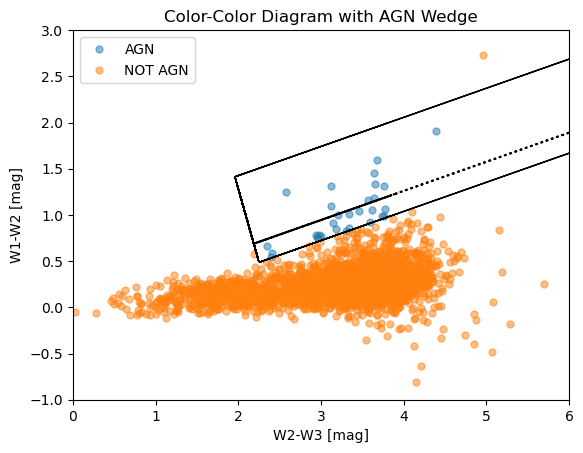

In [72]:
#Color-Color diagram based of Mateos, S. et al. (2013) classification

x=df13['W2-W3']
y=df13['W1-W2']
labels=df13['Mateos classification']

df14 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df14.groupby('label')

# Plot
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.plot(w2_w3[condt4],y4[condt4], color='black',linewidth=1)
plt.plot(w2_w3[condt2],y5[condt2], color='black',linewidth=1)
plt.plot(w2_w3[condt1],y1[condt1], color='black', linestyle= ':')
plt.plot(w2_w3[condt3],y6[condt3], color='black',linewidth=1)
    
plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.title("Color-Color Diagram with AGN Wedge")

plt.xlim(-0,6)
plt.ylim(-1,3)


ax.legend()

plt.show()

In [73]:
# Classifying the objects in the dataframe based on magnitude defined by Wright et al. (2010) 
# taken from Jarrett et al. (2017)")

df13['WISE Classification'] = ''
for i in range(len(df13)):
    if df13['W2-W3'][i] <= 2 and df13['W1-W2'][i] <= 0.8:
        df13['WISE Classification'][i] = 'spheroids'
    elif df13['W1-W2'][i] > 0.8:
        df13['WISE Classification'][i] = 'AGNs and u)LIRGS' 
    elif df13['W2-W3'][i] >2 and df13['W2-W3'][i]<3.5 and df13['W1-W2'][i] < 0.8:
        df13['WISE Classification'][i] = 'Intermediate discs'
    else:
        df13['WISE Classification'][i] = 'SF disc'
df13  

#This adds a column with the WISE classification

/tmp/ipykernel_41726/3642229635.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['WISE Classification'][i] = 'SF disc'


,plate,mjd,fiberid,redshift,ra,dec,oiii_5007_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,...,label_sii,label_oi,WHAN classification,w1mpro,w2mpro,w3mpro,W2-W3,W1-W2,Mateos classification,WISE Classification
0,392,51793,20,0.081405,9.981439,-0.800023,120.928600,194.29200,114.784900,80.138080,...,AGNs,HII,SF,14.774,14.452,10.639,3.813,0.322,NOT AGN,SF disc
1,421,51821,264,0.117167,14.696038,14.189442,11.482420,69.63947,32.728100,24.607480,...,HII,HII,sAGNs,13.933,13.711,10.523,3.188,0.222,NOT AGN,Intermediate discs
2,429,51820,337,0.097046,25.642194,14.830644,4.738802,49.69905,25.271630,16.422590,...,HII,HII,SF,14.529,14.307,11.144,3.163,0.222,NOT AGN,Intermediate discs
3,653,52145,303,0.121481,4.675777,-10.270538,17.909620,105.00660,43.018640,30.574330,...,HII,HII,sAGNs,13.692,13.532,10.831,2.701,0.160,NOT AGN,Intermediate discs
4,659,52199,629,0.110844,18.493989,-9.564990,15.394230,109.88110,33.895660,27.088970,...,HII,HII,sAGNs,13.539,13.288,9.589,3.699,0.251,NOT AGN,SF disc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,417,51821,525,0.141016,7.957917,16.074755,16.178780,50.88240,20.653350,15.512940,...,HII,HII,sAGNs,14.295,14.068,12.227,1.841,0.227,NOT AGN,spheroids
2972,655,52162,420,0.037475,9.951586,-9.142931,282.802500,354.93910,139.988800,104.703800,...,AGNs,AGNs,sAGNs,12.052,11.872,8.353,3.519,0.180,NOT AGN,SF disc
2973,663,52145,363,0.117584,24.449441,-8.362747,8.606062,32.23362,6.048911,6.277849,...,HII,HII,wAGNs,14.376,14.151,12.400,1.751,0.225,NOT AGN,spheroids
2974,693,52254,21,0.250722,16.538482,-0.526522,10.428850,51.07952,20.550240,21.250280,...,HII,AGNs,SF,15.789,15.501,11.565,3.936,0.288,NOT AGN,SF disc


In [74]:
#Count of classification

df13['WISE Classification'].value_counts()

Intermediate discs    1386
SF disc               1231
spheroids              313
AGNs and u)LIRGS        46
Name: WISE Classification, dtype: int64

<Figure size 1000x1000 with 0 Axes>

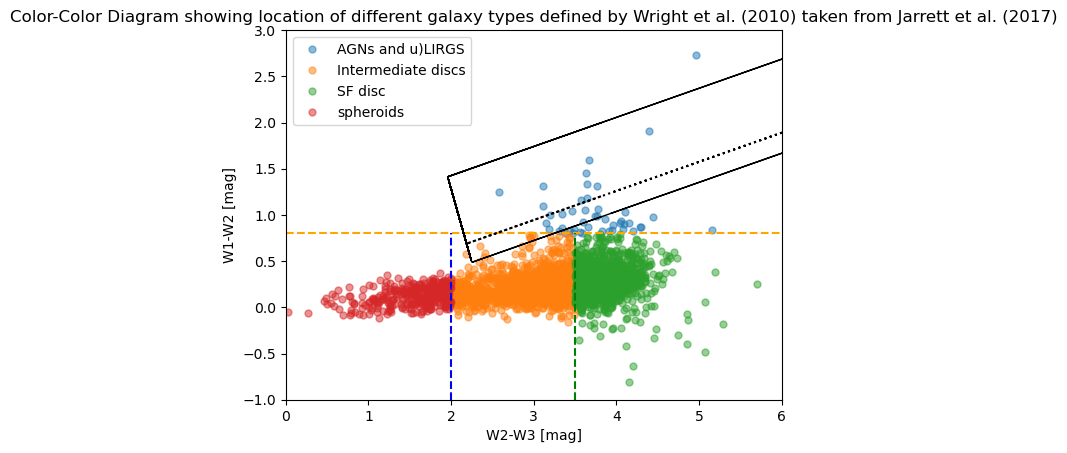

In [75]:
#Color-color diagram based on WISE classification

x=df13['W2-W3']
y=df13['W1-W2']
labels=df13['WISE Classification']

df14 = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df14.groupby('label')

# Plot
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, label=name, alpha=0.5)
    
plt.axhline(y=0.8, color='orange', linestyle='--')
plt.axvline(x=2,ymax=0.45, color='blue', linestyle='--')
plt.axvline(x=3.5,ymax=0.45, color='green', linestyle='--')
plt.plot(w2_w3[condt4],y4[condt4], color='black',linewidth=1)

    
plt.plot(w2_w3[condt2],y5[condt2], color='black',linewidth=1)
plt.plot(w2_w3[condt1],y1[condt1], color='black', linestyle= ':')
plt.plot(w2_w3[condt3],y6[condt3], color='black',linewidth=1)


plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.title("Color-Color Diagram showing location of different galaxy types defined by Wright et al. (2010) taken from Jarrett et al. (2017)")

plt.xlim(-0,6)
plt.ylim(-1,3)


ax.legend()

plt.show()

In [76]:
# Creating boolean mask for each Mateos classification and Jarrett(WISE) classification. 
mask_column1 = df13['Mateos classification'] == 'AGN'
mask_column2 = df13['WISE Classification'] == 'AGNs and u)LIRGS'
matches_agns = df13[mask_column1 & mask_column2]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and Mateos et al. (2013) are=",count_agns)


The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and Mateos et al. (2013) are= 22


In [77]:
# Creating boolean mask for each Mateos classification and Jarrett(WISE) classification. 
mask_column2 = df13['WISE Classification'] == 'AGNs and u)LIRGS'
mask_column3 = df['label_nii'] == 'AGNs'
matches_agns = df13[ mask_column2 & mask_column3]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and the first BPT classification are=",count_agns)


The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and the first BPT classification are= 9


/tmp/ipykernel_41726/47273567.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches_agns = df13[ mask_column2 & mask_column3]


In [78]:
# Creating boolean mask for each Mateos classification and Jarrett(WISE) classification. 
mask_column1 = df13['Mateos classification'] == 'AGN'
mask_column3 = df['label_nii'] == 'AGNs'
matches_agns = df13[mask_column1 & mask_column2 & mask_column3]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in Mateos et al. (2013) and the first BPT classification are=",count_agns)


The number of objects classifies as AGN in Mateos et al. (2013) and the first BPT classification are= 5


/tmp/ipykernel_41726/1920246726.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches_agns = df13[mask_column1 & mask_column2 & mask_column3]


In [79]:
# Creating boolean mask for each Mateos classification and Jarrett(WISE) classification. 
mask_column1 = df13['Mateos classification'] == 'AGN'
mask_column2 = df13['WISE Classification'] == 'AGNs and u)LIRGS'
mask_column3 = df['label_nii'] == 'AGNs'
matches_agns = df13[mask_column1 & mask_column2 & mask_column3]
count_agns = matches_agns.shape[0]

print("The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and Mateos et al. (2013) and the first BPT classification are=",count_agns)


The number of objects classifies as AGN in WISE (Wright et al. (2010) taken from Jarrett et al. (2017) and Mateos et al. (2013) and the first BPT classification are= 5


/tmp/ipykernel_41726/1793971938.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matches_agns = df13[mask_column1 & mask_column2 & mask_column3]


### Overlaying my Color-Color diagram with Jarrett et al.(2017)

Text(0.5, 1.0, 'Overlay of the Jarrett et al.(2017) and my plot')

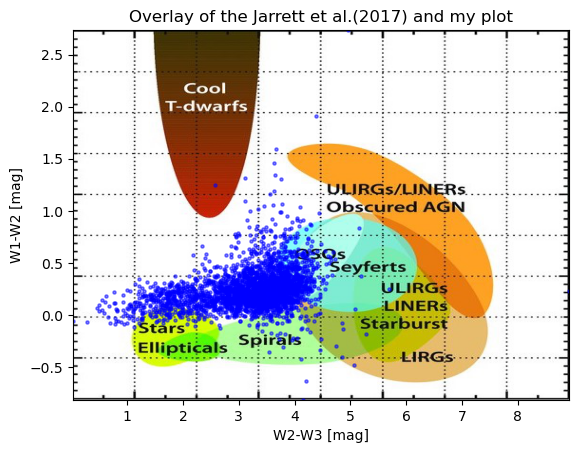

In [80]:
import matplotlib.image as mpimg

image_path = '/home/sagarika/Downloads/Wright1.jpg' 
image = mpimg.imread(image_path)

x_values = df13['W2-W3']
y_values = df13['W1-W2']


plt.scatter(x_values, y_values, color='blue',s=5, alpha=0.5)


plt.imshow(image, extent=[min(x_values), max(x_values), min(y_values), max(y_values)], aspect='auto')

plt.xlabel("W2-W3 [mag]")
plt.ylabel("W1-W2 [mag]")
plt.title("Overlay of the Jarrett et al.(2017) and my plot")


# Plotting Correlation Matrix for the data frames used in the three tasks

/tmp/ipykernel_41726/4043138325.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


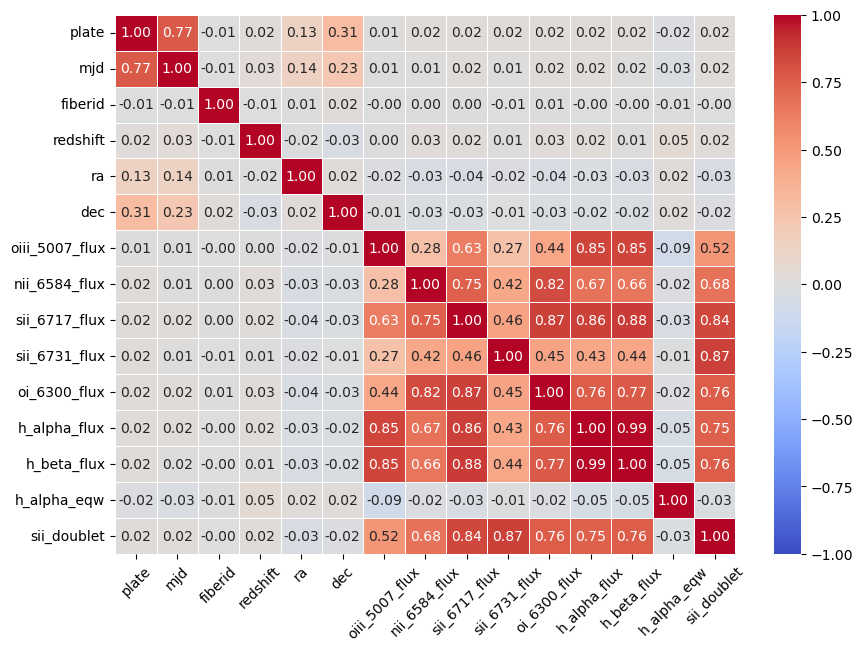

In [81]:
#For TASK 1

corr = df.corr()

# Plotting the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_41726/3831016301.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df9.corr()


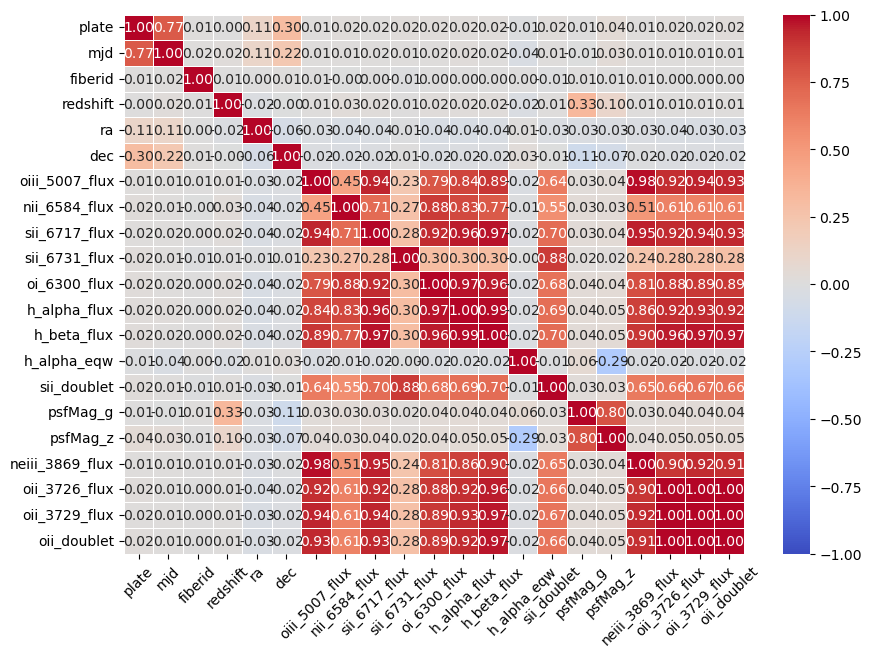

In [82]:
#For task 2

corr = df9.corr()

# Plotting the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidth=0.5)
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_41726/3960833433.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df13.corr()


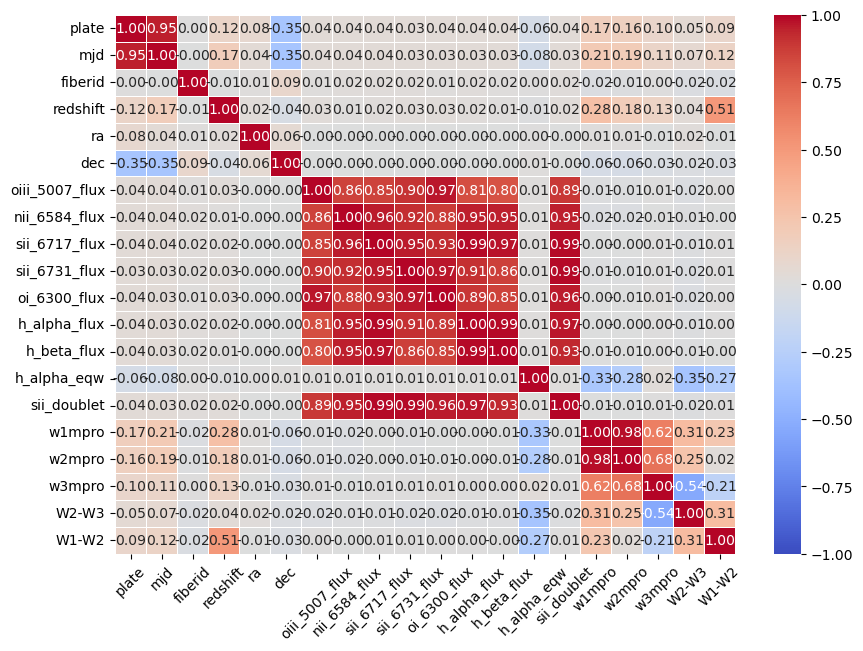

In [83]:
# For task 3

corr = df13.corr()

# Plotting the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidth=0.5)
plt.xticks(rotation=45)
plt.show()